# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

Issue: To study scoring patterns of ACT and SAT and how the increase in number of students has changed it.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [3]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [4]:
pwd

'C:\\Users\\bhavn\\Desktop\\dsi-sg-10_workdir\\Project 1\\project_1\\code'

In [5]:
#converting csv file to dataframe
act2017 = pd.read_csv('../data/act_2017.csv')
sat2017 = pd.read_csv('../data/sat_2017.csv')


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [6]:
#to find type of data
print(type(act2017))
act2017['Participation'].dtype


<class 'pandas.core.frame.DataFrame'>


dtype('O')

In [7]:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [8]:
print(type(sat2017))
sat2017 ['Participation'].dtype

<class 'pandas.core.frame.DataFrame'>


dtype('O')

In [9]:
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [10]:
#act2017 
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [11]:
#sat2017 
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

ACT: The data is in columns of individual state-wise averages in participation rates(in %), English, Math, Reading, Science and Composite scores(in float)

SAT: The data is in columns of individual state-wise averages in participation rates(in %), Evidence-Based Reading and Writing, Math and Total scores (in integers)

#### 4a. Does the data look complete? 

Yes, it is complete. However, some of the values appear to be errors

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: The highest possible score on the ACT is 36. The current average ACT score is 21.
Scores below a 15 on the ACT are considered low at just about any four-year college. You can overcome low scores with a great GPA or an outstanding college application. But even if you're accepted, the school may ask you to take some remedial courses before enrolling.
Ref: https://www.princetonreview.com/college-advice/good-act-scores

Score Structure
•	Total score: 400–1600
•	Evidence-Based Reading and Writing Section: 200–800
•	Math Section: 200–800
•	SAT Essay: Three scores ranging from 2–8
Ref: https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/interpreting


In [12]:
#getting reference values from approved sources for data checking
act2017_ref = pd.read_csv('../data/ACT2017.csv')
act2017_ref.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [13]:
# checking the data using .describe

act2017.describe()                # min for Science appears to be in error

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [14]:
# checking data using .info

act2017.info()                  # Composite identified as non-null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [15]:
#act2017 - Science score min is not inline with other values for one state. 
#checking for values below 25$ percentile
#act2017 - 'Composite' column returned type as non-null, so identifying non-numerical input 
act2017[act2017['Science']<19.9]

,State,Participation,English,Math,Reading,Science,Composite
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
10,Florida,73%,19.0,19.4,21.0,19.4,19.8
12,Hawaii,90%,17.8,19.2,19.2,19.3,19.0
19,Louisiana,100%,19.4,18.8,19.8,19.6,19.5
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6
29,Nevada,100%,16.3,18.0,18.1,18.2,17.8
34,North Carolina,100%,17.8,19.3,19.6,19.3,19.1


In [16]:
# comparing values of individual cells with range of average score in reference document.
# values found outside the range /values with errors identified and replaced
#replacing defective values with values from act2017_ref, obtained from ACT website.

act2017.loc[21, 'Science'] = 23.2
act2017.loc[51, 'Composite'] = 20.2
act2017

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [17]:
# checking datatupes of variable

act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [18]:
#converting 'Participation' into integer and removing '%' sign

act2017['Participation'] = act2017['Participation'].str[:-1].astype(float)
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [19]:
# checking on datatype

act2017['Composite'].dtype

dtype('O')

In [20]:
# replacing datatype

act2017['Composite']= act2017['Composite'].astype(float)
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [21]:
# checking for errors in data using .describe

sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [22]:
# checking for errors in data using .info

sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [23]:
#getting refernce values from approved sources for data checking
sat2017_ref = pd.read_csv('../data/SAT2017.csv')
sat2017_ref.head()

,State,Participation,ERW,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [24]:
#sat2017 - Math min is in variance from other min values
#checking values less than 25% percentile
#identified value of 'Maryland' is faulty and obtained correct value from sat2017_ref obtained from website
sat2017[sat2017['Math']<522]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017
10,Georgia,61%,535,515,1050
12,Idaho,93%,513,493,1005
19,Maine,95%,513,499,1012
20,Maryland,69%,536,52,1060
22,Michigan,100%,509,495,1005
29,New Hampshire,96%,532,520,1052


In [25]:
#converting Participation into float
#replacing with corrected value for Maryland.Math
sat2017['Participation'] = sat2017['Participation'].str[:-1].astype(float)
sat2017.loc[20, 'Math'] = 524
sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [26]:
# confirming datatypes

sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### 5. What are your data types? 
Display the data types of each feature. 

In [27]:
State is a string, other columns are integers or floats

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [28]:
# conversion to float done above
# act2017['Participation'] = act2017['Participation'].str[:-1].astype(float)



- Fix any individual values preventing other columns from being the appropriate type.

In [29]:
#corrections made above and cleaned datasets -  act2017 and sat2017

- Finish your data modifications by making sure the columns are now typed appropriately.

In [30]:
#corrections made above and cleaned datasets -  act2017 and sat2017

- Display the data types again to confirm they are correct.

In [31]:
#confirming datatypes

act2017.info()
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [32]:
act2017.rename(columns={'State':'state', 'Participation':'act2017_participation',
                        'English':'act2017_eng', 'Math':'act2017_math', 'Reading':'act2017_reading', 
                        'Science':'act2017_science','Composite':'act2017_composite'}, inplace=True)

act2017.head()

,state,act2017_participation,act2017_eng,act2017_math,act2017_reading,act2017_science,act2017_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [33]:
#replace column names for act2017
act2017.rename(columns={'State':'state', 'Participation':'act2017_participation',
                        'English':'act2017_eng', 'Math':'act2017_math', 'Reading':'act2017_reading', 
                        'Science':'act2017_science','Composite':'act2017_composite'}, inplace=True)
act2017.head()

,state,act2017_participation,act2017_eng,act2017_math,act2017_reading,act2017_science,act2017_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [34]:
sat2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [35]:
#replace column names for sat2017
sat2017.rename(columns={'State':'state', 'Participation':'sat2017_participation',
                        'Evidence-Based Reading and Writing':'sat2017_evi_based_read_write', 'Math':'sat2017_math', 'Total':'sat2017_total'}, inplace=True)
sat2017

,state,sat2017_participation,sat2017_evi_based_read_write,sat2017_math,sat2017_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055
5,Colorado,11.0,606,595,1201
6,Connecticut,100.0,530,512,1041
7,Delaware,100.0,503,492,996
8,District of Columbia,100.0,482,468,950
9,Florida,83.0,520,497,1017


In [36]:
sat2017.columns

Index(['state', 'sat2017_participation', 'sat2017_evi_based_read_write',
       'sat2017_math', 'sat2017_total'],
      dtype='object')

In [37]:
sat2017['sat2017_evi_based_read_write']= sat2017['sat2017_evi_based_read_write'].astype(float)
sat2017['sat2017_math']= sat2017['sat2017_math'].astype(float)
sat2017['sat2017_total']= sat2017['sat2017_total'].astype(float)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state| object | ACT /SAT |Name of State| 
|act20**_participation | float | ACT|average %| 
|act20**_eng| float | ACT |average score| 
|act20**_math| float | ACT |average score| 
|act20**_reading | float | ACT |average score| 
|act20**_science | float | ACT |average score| 
|act20**_composite|float|ACT |average score| 
|sat20**_participation| float | SAT |average %| 
|sat20**_evi_based_read_write| float |SAT|average score|
|sat20**_math| float | SAT |average score| 
|sat20**_total| float | SAT |average score| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [38]:
# dropping of extra rows

act2017 = act2017.drop(0, axis=0)
act2017.head()

,state,act2017_participation,act2017_eng,act2017_math,act2017_reading,act2017_science,act2017_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [39]:
# combining dataframes

jt2017 = pd.merge(act2017, sat2017, on='state', how='outer' )
jt2017.head(10)

,state,act2017_participation,act2017_eng,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evi_based_read_write,sat2017_math,sat2017_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606.0,595.0,1201.0
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,1017.0


In [40]:
# to know number of rows and columns

jt2017.shape

(51, 11)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [41]:
 #saving data as csv file

jt2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [42]:
# converting to dataframe
act2018 = pd.read_csv('../data/act_2018.csv')
sat2018 = pd.read_csv('../data/sat_2018.csv')


In [43]:
act2018.head(10)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


In [44]:
# to know number of rows and columns

act2018.shape

(52, 7)

In [45]:
# checking dataset with .info()

act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State                            52 non-null object
Percentage of Students Tested    52 non-null object
Average Composite Score          52 non-null float64
Average English Score            52 non-null float64
Average Math Score               52 non-null float64
Average Reading Score            52 non-null float64
Average Science Score            52 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [46]:
# to know column index

act2018.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [47]:
# renaming of columns
act2018.rename(columns={'State':'state', 'Percentage of Students Tested':'act2018_participation', 
                        'Average Composite Score':'act2018_composite',
                        'Average English Score':'act2018_eng', 
                        'Average Math Score':'act2018_math', 
                        'Average Reading Score':'act2018_reading', 
                        'Average Science Score':'act2018_science'}, inplace=True)
act2018.head()

,state,act2018_participation,act2018_composite,act2018_eng,act2018_math,act2018_reading,act2018_science
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [48]:
# confirming details with .describe

act2018.describe()

,act2018_composite,act2018_eng,act2018_math,act2018_reading,act2018_science
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,21.473077,20.973077,21.113462,22.001923,21.332692
std,2.087696,2.424719,2.017573,2.148186,1.853848
min,17.700000,16.600000,17.800000,18.000000,17.900000
25%,19.975000,19.100000,19.400000,20.475000,19.925000
50%,21.050000,20.200000,20.650000,21.450000,20.950000
75%,23.525000,23.700000,23.125000,24.050000,23.025000
max,25.600000,26.000000,25.200000,26.100000,24.900000


In [49]:
# confirming details with .info

act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
state                    52 non-null object
act2018_participation    52 non-null object
act2018_composite        52 non-null float64
act2018_eng              52 non-null float64
act2018_math             52 non-null float64
act2018_reading          52 non-null float64
act2018_science          52 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [50]:
# identifying location of missing data

act2018[(act2018['act2018_participation'] == 'Not given') ]


,state,act2018_participation,act2018_composite,act2018_eng,act2018_math,act2018_reading,act2018_science
18,Louisiana,Not given,19.2,19.0,18.5,19.6,19.1
33,North Carolina,Not given,19.1,18.0,19.3,19.5,19.2
36,Oklahoma,Not given,19.3,18.4,18.8,20.1,19.4
38,Pennsylvania,Not given,23.5,23.3,23.2,24.0,23.1
51,National,Not given,20.8,20.2,20.5,21.3,20.7


In [51]:
#replacing 'Not given' with values from reference doc


act2018.loc[18, 'act2018_participation'] = 100
act2018.loc[33, 'act2018_participation'] = 100
act2018.loc[36, 'act2018_participation'] = 100
act2018.loc[38, 'act2018_participation'] = 20
act2018.loc[51, 'act2018_participation'] = 55

act2018

,state,act2018_participation,act2018_composite,act2018_eng,act2018_math,act2018_reading,act2018_science
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


In [52]:
# change to float
act2018['act2018_participation']= act2018['act2018_participation'].astype(float)
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
state                    52 non-null object
act2018_participation    52 non-null float64
act2018_composite        52 non-null float64
act2018_eng              52 non-null float64
act2018_math             52 non-null float64
act2018_reading          52 non-null float64
act2018_science          52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [53]:
# size of dataframe

act2018 = act2018.drop(51, axis=0)
act2018.shape

(51, 7)

In [54]:
sat2018

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [55]:
# to know details using .info

sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [56]:
#to know details using .describe()

sat2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [57]:
# conversion string to float

sat2018['Participation'] = sat2018['Participation'].str[:-1].astype(float)
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [58]:
# to know column index

sat2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [59]:
sat2018.rename(columns={'State':'state', 
                        'Participation':'sat2018_participation',
                        'Evidence-Based Reading and Writing':'sat2018_evi_based_read_write', 
                        'Math':'sat2018_math', 
                        'Total':'sat2018_total'}, inplace=True)
sat2018

,state,sat2018_participation,sat2018_evi_based_read_write,sat2018_math,sat2018_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076
5,Colorado,100.0,519,506,1025
6,Connecticut,100.0,535,519,1053
7,Delaware,100.0,505,492,998
8,District of Columbia,92.0,497,480,977
9,Florida,56.0,550,549,1099


In [60]:
# changing datatype to float

sat2018['sat2018_evi_based_read_write']= sat2018['sat2018_evi_based_read_write'].astype(float)
sat2018['sat2018_math']= sat2018['sat2018_math'].astype(float)
sat2018['sat2018_total']= sat2018['sat2018_total'].astype(float)

In [61]:
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                           51 non-null object
sat2018_participation           51 non-null float64
sat2018_evi_based_read_write    51 non-null float64
sat2018_math                    51 non-null float64
sat2018_total                   51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [62]:
# combining ACT2018 and SAT2018

jt2018 = pd.merge(act2018, sat2018, on='state', how='outer' )
jt2018.head(10)

,state,act2018_participation,act2018_composite,act2018_eng,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_evi_based_read_write,sat2018_math,sat2018_total
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595.0,571.0,1166.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562.0,544.0,1106.0
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577.0,572.0,1149.0
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592.0,576.0,1169.0
4,California,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540.0,536.0,1076.0
5,Colorado,30.0,23.9,23.9,23.2,24.4,23.5,100.0,519.0,506.0,1025.0
6,Connecticut,26.0,25.6,26.0,24.8,26.1,24.9,100.0,535.0,519.0,1053.0
7,Delaware,17.0,23.2,23.7,23.1,24.5,23.4,100.0,505.0,492.0,998.0
8,District of Columbia,32.0,23.6,23.7,22.7,24.4,23.0,92.0,497.0,480.0,977.0
9,Florida,66.0,19.9,19.2,19.3,21.1,19.5,56.0,550.0,549.0,1099.0


In [63]:
jt2018.shape

(51, 11)

In [64]:
#saving data as csv file

jt2018.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [65]:
#combining data for 2017 and 2018

final = pd.merge(jt2017, jt2018, on='state', how='outer' )
final.head(10)

,state,act2017_participation,act2017_eng,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evi_based_read_write,sat2017_math,...,act2018_participation,act2018_composite,act2018_eng,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_evi_based_read_write,sat2018_math,sat2018_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,...,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595.0,571.0,1166.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,...,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562.0,544.0,1106.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,...,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577.0,572.0,1149.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,...,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592.0,576.0,1169.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,...,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540.0,536.0,1076.0
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606.0,595.0,...,30.0,23.9,23.9,23.2,24.4,23.5,100.0,519.0,506.0,1025.0
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,...,26.0,25.6,26.0,24.8,26.1,24.9,100.0,535.0,519.0,1053.0
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,...,17.0,23.2,23.7,23.1,24.5,23.4,100.0,505.0,492.0,998.0
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,...,32.0,23.6,23.7,22.7,24.4,23.0,92.0,497.0,480.0,977.0
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,...,66.0,19.9,19.2,19.3,21.1,19.5,56.0,550.0,549.0,1099.0


In [66]:
# confirming size of dataframe

final.shape

(51, 21)

In [ ]:
#saving data as csv file

final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [70]:
# to transpose the describe function for 'final'
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act2017_eng,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat2017_evi_based_read_write,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


Looking at average scores for individual subjects, the difference in mean and median (50% percentile) indicates the skewness of the data. 
Skewness for ACT Math score has increased in 2018
Skewness for SAT Reading and Math scores is evident in both 2017 and 2018

In [71]:
#comparing ACT scores stats fo 2017 and 2018

final[['act2017_math', 'act2018_math']].describe()

,act2017_math,act2018_math
count,51.000000,51.000000
mean,21.182353,21.125490
std,1.981989,2.035765
min,18.000000,17.800000
25%,19.400000,19.400000
50%,20.900000,20.700000
75%,23.100000,23.150000
max,25.300000,25.200000


In [72]:
# comparing SAT scores stats for 2017 and 2018

final[['sat2017_evi_based_read_write', 'sat2018_evi_based_read_write', 'sat2017_math', 'sat2018_math']].describe()

,sat2017_evi_based_read_write,sat2018_evi_based_read_write,sat2017_math,sat2018_math
count,51.000000,51.000000,51.000000,51.000000
mean,569.117647,563.686275,556.882353,556.235294
std,45.666901,47.502627,47.121395,47.772623
min,482.000000,480.000000,468.000000,480.000000
25%,533.500000,534.500000,523.500000,522.500000
50%,559.000000,552.000000,548.000000,544.000000
75%,613.000000,610.500000,599.000000,593.500000
max,644.000000,643.000000,651.000000,655.000000


In [73]:
#confirming number of rows

len(final.index)

51

In [74]:
# confirming number of columns

len(final.columns)

21

In [75]:
# confirming details with .info

final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state                           51 non-null object
act2017_participation           51 non-null float64
act2017_eng                     51 non-null float64
act2017_math                    51 non-null float64
act2017_reading                 51 non-null float64
act2017_science                 51 non-null float64
act2017_composite               51 non-null float64
sat2017_participation           51 non-null float64
sat2017_evi_based_read_write    51 non-null float64
sat2017_math                    51 non-null float64
sat2017_total                   51 non-null float64
act2018_participation           51 non-null float64
act2018_composite               51 non-null float64
act2018_eng                     51 non-null float64
act2018_math                    51 non-null float64
act2018_reading                 51 non-null float64
act2018_science                 51 non-null float64
sat2018_partic

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [77]:
# calculation of std deviation

import math

def calc_std_dev(numbers):
    num_sum=0
    sq_sum=0
    num_sum = np.sum(numbers)
    mean = num_sum/(len(numbers))
    for i in numbers:
        sq_sum = sq_sum +((i - mean)**2)
    std_dev = math.sqrt(sq_sum/(len(numbers)))
    return std_dev
 
 
calc_std_dev(final['act2017_participation'])
        

31.824175751231806

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [78]:
#Calcn of Std Dev using function

df_dict = {col: calc_std_dev(final[col]) for col in final.columns[1:]}
df_dict

{'act2017_participation': 31.824175751231806,
 'act2017_eng': 2.3304876369363363,
 'act2017_math': 1.9624620273436781,
 'act2017_reading': 2.0469029314842646,
 'act2017_science': 1.7222161451443676,
 'act2017_composite': 2.000786081581989,
 'sat2017_participation': 34.92907076664508,
 'sat2017_evi_based_read_write': 45.21697020437866,
 'sat2017_math': 46.65713364485503,
 'sat2017_total': 91.58351056778743,
 'act2018_participation': 33.745194881997506,
 'act2018_composite': 2.0855261815801147,
 'act2018_eng': 2.4222536143202795,
 'act2018_math': 2.0157072555557174,
 'act2018_reading': 2.145891884510421,
 'act2018_science': 1.851688548483354,
 'sat2018_participation': 36.946619223539415,
 'sat2018_evi_based_read_write': 47.03460978357609,
 'sat2018_math': 47.30194550378352,
 'sat2018_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [79]:
np.std(final['act2018_science'])

1.8516885484833543

Answer: There are minor differences in the values calculated manually and using the pandas.describe. 
The manually calculated values, do however, match with numpy's std method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [80]:
final.columns

Index(['state', 'act2017_participation', 'act2017_eng', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite',
       'sat2017_participation', 'sat2017_evi_based_read_write', 'sat2017_math',
       'sat2017_total', 'act2018_participation', 'act2018_composite',
       'act2018_eng', 'act2018_math', 'act2018_reading', 'act2018_science',
       'sat2018_participation', 'sat2018_evi_based_read_write', 'sat2018_math',
       'sat2018_total'],
      dtype='object')

In [81]:
# highest participation rates

final.sort_values(['act2017_participation'], ascending = False).head(20)[['state','act2017_participation']]


,state,act2017_participation
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


In [82]:
# highest participation rates

final.sort_values(['sat2017_participation'], ascending = False).head(10)[['state','sat2017_participation']]


,state,sat2017_participation
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0
19,Maine,95.0
12,Idaho,93.0
9,Florida,83.0
21,Massachusetts,76.0
39,Rhode Island,71.0


In [83]:
# highest participation rates

final.sort_values(['act2018_participation'], ascending = False).head(20)[['state','act2018_participation']]


,state,act2018_participation
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
35,Ohio,100.0
33,North Carolina,100.0
28,Nevada,100.0


In [84]:
# highest participation rates

final.sort_values(['sat2018_participation'], ascending = False).head(10)[['state','sat2017_participation','sat2018_participation']]


,state,sat2017_participation,sat2018_participation
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
22,Michigan,100.0,100.0
12,Idaho,93.0,100.0
19,Maine,95.0,99.0
13,Illinois,9.0,99.0
39,Rhode Island,71.0,97.0
29,New Hampshire,96.0,96.0
8,District of Columbia,100.0,92.0


In [85]:
#lowest participation rates
final.sort_values(['act2017_participation'], ascending = False).tail()[['state','act2017_participation']]


,state,act2017_participation
38,Pennsylvania,23.0
39,Rhode Island,21.0
7,Delaware,18.0
29,New Hampshire,18.0
19,Maine,8.0


In [86]:
#lowest participation rates
final.sort_values(['sat2017_participation'], ascending = False).tail(15)[['state','sat2017_participation']]


,state,sat2017_participation
42,Tennessee,5.0
17,Kentucky,4.0
16,Kansas,4.0
18,Louisiana,4.0
44,Utah,3.0
49,Wisconsin,3.0
25,Missouri,3.0
41,South Dakota,3.0
27,Nebraska,3.0
23,Minnesota,3.0


In [87]:
#lowest participation rates
final.sort_values(['act2018_participation'], ascending = False).tail()[['state','act2018_participation']]


,state,act2018_participation
38,Pennsylvania,20.0
7,Delaware,17.0
29,New Hampshire,16.0
39,Rhode Island,15.0
19,Maine,7.0


In [88]:
#lowest participation rates
final.sort_values(['sat2018_participation'], ascending = False).tail(10)[['state','sat2017_participation','sat2018_participation']]


,state,sat2017_participation,sat2018_participation
18,Louisiana,4.0,4.0
17,Kentucky,4.0,4.0
16,Kansas,4.0,4.0
41,South Dakota,3.0,3.0
27,Nebraska,3.0,3.0
24,Mississippi,2.0,3.0
15,Iowa,2.0,3.0
49,Wisconsin,3.0,3.0
50,Wyoming,3.0,3.0
34,North Dakota,2.0,2.0


Answer: The participation in the college admission test has increased, due to various factors. Some of the contributing factors are:
1. Mandatory requirements for admission to institutes of higher learning
2. Fee waivers offered by states 
3. Increased push by pushed to expand its market share in recent years by revising the test and entering into deals with numerous states and school systems to give students the exam. 

The increasing number of students has impacted the state average scores of the tests themselves. This study is also another opportunity to assess the performance of the 2017 and 2018 cohorts in the ACT and SAT tests.

Ref:
1. https://en.wikipedia.org/wiki/List_of_standardized_tests_in_the_United_States#Admissions_tests
2. https://www.usnews.com/education/best-colleges/articles/2018-01-23/how-to-take-the-sat-act-for-free
3. https://www.edweek.org/ew/articles/2017/09/07/us-students-scores-inch-up-on-latest.html

Participation rate in the ACT has been steady for the two years. However, an increased number of states hjave achieved 100% participation rate for SAT as can be seen from plots (below).

'    '

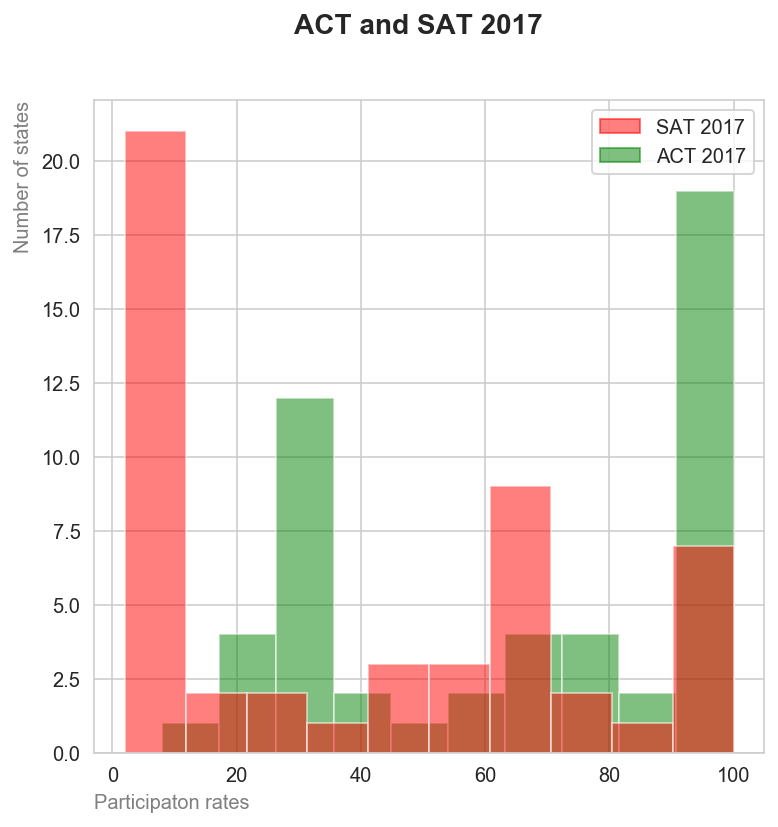

In [89]:
import matplotlib.patches as mpatches

plt.figure(figsize= (6,6))
plt.hist(final['act2017_participation'], bins = 10, color='g', alpha = 0.5)
plt.hist(final['sat2017_participation'], bins = 10, color='r', alpha = 0.5)
plt.xlabel('Participaton rates', position = (0,0), ha = 'left', color = 'grey') # (x,y)
plt.ylabel("Number of states", position = (0, 1), ha = 'right', color = 'grey')
plt.suptitle('ACT and SAT 2017', fontsize=14, fontweight='bold')
red_patch = mpatches.Patch(color='r', alpha = 0.5, label='SAT 2017')
green_patch = mpatches.Patch(color='g', alpha = 0.5, label='ACT 2017')
plt.legend(handles=[red_patch, green_patch])
;     

'    '

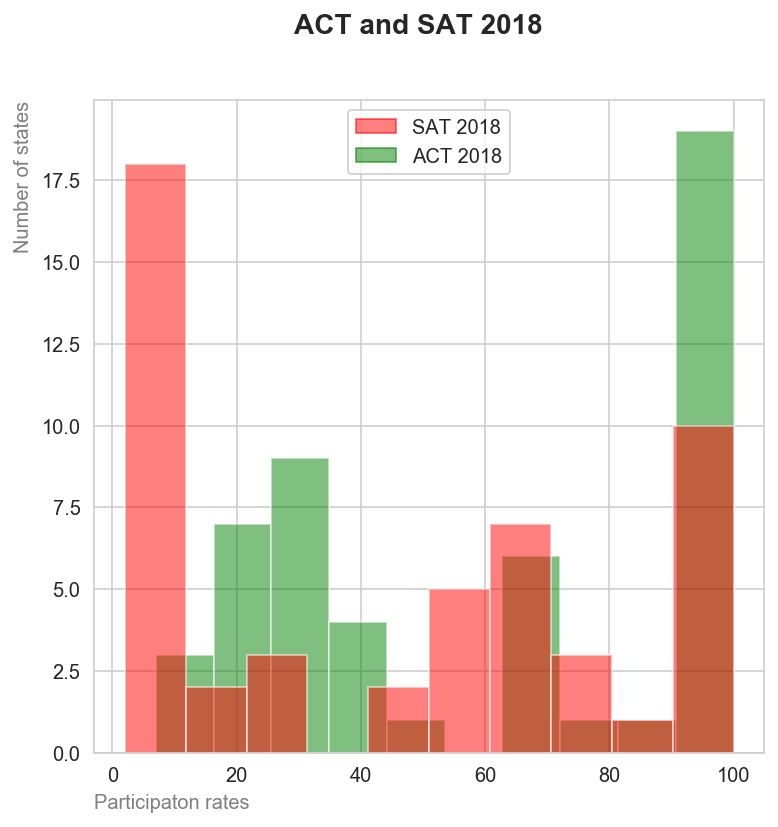

In [90]:
import matplotlib.patches as mpatches

plt.figure(figsize= (6,6))
plt.hist(final['act2018_participation'], bins = 10, color='g', alpha = 0.5)
plt.hist(final['sat2018_participation'], bins = 10, color='r', alpha = 0.5)
plt.xlabel('Participaton rates', position = (0,0), ha = 'left', color = 'grey') # (x,y)
plt.ylabel("Number of states", position = (0, 1), ha = 'right', color = 'grey')
plt.suptitle('ACT and SAT 2018', fontsize=14, fontweight='bold')
red_patch = mpatches.Patch(color='r', alpha = 0.5, label='SAT 2018')
green_patch = mpatches.Patch(color='g', alpha = 0.5, label='ACT 2018')
plt.legend(handles=[red_patch, green_patch])
;     

In [91]:
final.columns

Index(['state', 'act2017_participation', 'act2017_eng', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite',
       'sat2017_participation', 'sat2017_evi_based_read_write', 'sat2017_math',
       'sat2017_total', 'act2018_participation', 'act2018_composite',
       'act2018_eng', 'act2018_math', 'act2018_reading', 'act2018_science',
       'sat2018_participation', 'sat2018_evi_based_read_write', 'sat2018_math',
       'sat2018_total'],
      dtype='object')

In [92]:
composite = final[['act2017_composite', 'act2018_composite', 'sat2017_total', 'sat2018_total']]
composite.head()

,act2017_composite,act2018_composite,sat2017_total,sat2018_total
0,19.2,19.1,1165.0,1166.0
1,19.8,20.8,1080.0,1106.0
2,19.7,19.2,1116.0,1149.0
3,19.4,19.4,1208.0,1169.0
4,22.8,22.7,1055.0,1076.0


In [93]:
# states have the highest mean total/composite scores

final.sort_values(['act2017_composite'], ascending = False).head()[['state','act2017_composite']]

,state,act2017_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [94]:
# states have the highest mean total/composite scores

final.sort_values(['act2018_composite'], ascending = False).head()[['state','act2018_composite']]


,state,act2018_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [95]:
# states have the highest mean total/composite scores
final.sort_values(['sat2017_total'], ascending = False).head()[['state','sat2017_total']]

,state,sat2017_total
23,Minnesota,1295.0
49,Wisconsin,1291.0
15,Iowa,1275.0
25,Missouri,1271.0
16,Kansas,1260.0


In [96]:
# states have the highest mean total/composite scores
final.sort_values(['sat2018_total'], ascending = False).head()[['state','sat2018_total']]

,state,sat2018_total
23,Minnesota,1298.0
49,Wisconsin,1294.0
34,North Dakota,1283.0
15,Iowa,1265.0
16,Kansas,1265.0


In [97]:
# states have the lowest mean total/composite scores

final.sort_values(['act2017_composite'], ascending = False).tail()[['state','act2017_composite']]


,state,act2017_composite
33,North Carolina,19.1
11,Hawaii,19.0
40,South Carolina,18.7
24,Mississippi,18.6
28,Nevada,17.8


In [98]:
# states have the lowest mean total/composite scores

final.sort_values(['act2018_composite'], ascending = False).tail()[['state','act2018_composite']]


,state,act2018_composite
0,Alabama,19.1
11,Hawaii,18.9
24,Mississippi,18.6
40,South Carolina,18.3
28,Nevada,17.7


In [99]:
# states have the lowest mean total/composite scores
final.sort_values(['sat2017_total'], ascending = False).tail()[['state','sat2017_total']]

,state,sat2017_total
19,Maine,1012.0
12,Idaho,1005.0
22,Michigan,1005.0
7,Delaware,996.0
8,District of Columbia,950.0


In [100]:
# states have the lowest mean total/composite scores
final.sort_values(['sat2018_total'], ascending = False).tail()[['state','sat2018_total']]

,state,sat2018_total
11,Hawaii,1010.0
12,Idaho,1001.0
48,West Virginia,999.0
7,Delaware,998.0
8,District of Columbia,977.0


In [101]:
# Do any states with 100% participation on a given test have a rate change year-to-year?

final[(final['act2017_participation'] == 100)][['state','act2017_composite', 'act2018_composite']]

,state,act2017_composite,act2018_composite
0,Alabama,19.2,19.1
3,Arkansas,19.4,19.4
5,Colorado,20.8,23.9
17,Kentucky,20.0,20.2
18,Louisiana,19.5,19.2
23,Minnesota,21.5,21.3
24,Mississippi,18.6,18.6
25,Missouri,20.4,20.0
26,Montana,20.3,20.0
28,Nevada,17.8,17.7


In [102]:
# Do any states show have >50% participation on both tests either year?

high_participation = ((final['act2017_participation']> 50) & (final['sat2017_participation']> 50))
final[high_participation]

,state,act2017_participation,act2017_eng,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evi_based_read_write,sat2017_math,...,act2018_participation,act2018_composite,act2018_eng,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_evi_based_read_write,sat2018_math,sat2018_total
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,...,66.0,19.9,19.2,19.3,21.1,19.5,56.0,550.0,549.0,1099.0
10,Georgia,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535.0,515.0,...,53.0,21.4,20.9,20.7,21.2,21.4,70.0,542.0,522.0,1064.0
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544.0,541.0,...,89.0,18.9,18.2,19.0,19.1,19.0,56.0,480.0,530.0,1010.0


In [103]:
high_participation_2 = ((final['act2017_participation']< 20) & (final['sat2017_participation']> 80))
final[high_participation_2]

,state,act2017_participation,act2017_eng,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evi_based_read_write,sat2017_math,...,act2018_participation,act2018_composite,act2018_eng,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_evi_based_read_write,sat2018_math,sat2018_total
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,...,17.0,23.2,23.7,23.1,24.5,23.4,100.0,505.0,492.0,998.0
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,...,7.0,24.0,23.8,23.6,24.7,23.4,99.0,512.0,501.0,1013.0
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,...,16.0,25.1,25.1,24.7,25.6,24.4,96.0,535.0,528.0,1063.0


In [104]:
# checking if the data distribution is Normal

for a in final.columns[1:]:
    print(a,stats.normaltest(final[a]))

act2017_participation NormaltestResult(statistic=72.50510406893655, pvalue=1.8018419611696254e-16)
act2017_eng NormaltestResult(statistic=4.945616782086351, pvalue=0.08434764489205682)
act2017_math NormaltestResult(statistic=6.547294554392776, pvalue=0.03786805958606832)
act2017_reading NormaltestResult(statistic=6.248639549660324, pvalue=0.04396683079879635)
act2017_science NormaltestResult(statistic=5.501326521192357, pvalue=0.06388547443366324)
act2017_composite NormaltestResult(statistic=6.557389886662569, pvalue=0.03767739587231253)
sat2017_participation NormaltestResult(statistic=24.844012826931053, pvalue=4.028943345766873e-06)
sat2017_evi_based_read_write NormaltestResult(statistic=13.81815328788405, pvalue=0.0009986795076584)
sat2017_math NormaltestResult(statistic=5.762201767738943, pvalue=0.056072998982864684)
sat2017_total NormaltestResult(statistic=9.607185954097002, pvalue=0.008200230814088539)
act2018_participation NormaltestResult(statistic=142.42948808997522, pvalue=1.

Answer: p-value is less than alpha (0.05) and hence the distribution of the following are not Normal.
act2017_math
act2017_reading
sat2017_evi_based_read_write
act2018_eng
act2018_math
act2018_reading
act2018_science
sat2018_math

For the following, since p-value is greater than alpha, there is insufficient evidence to show that the distribution is Normal.
act2017_eng
act2017_science
sat2017_math
sat2018_evi_based_read_write

The higher number of non-Normal distributions could be probable due to the increased number of students taking up the tests and hence skewing the distribution toward the lower scores. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [ ]:
import seaborn as sns

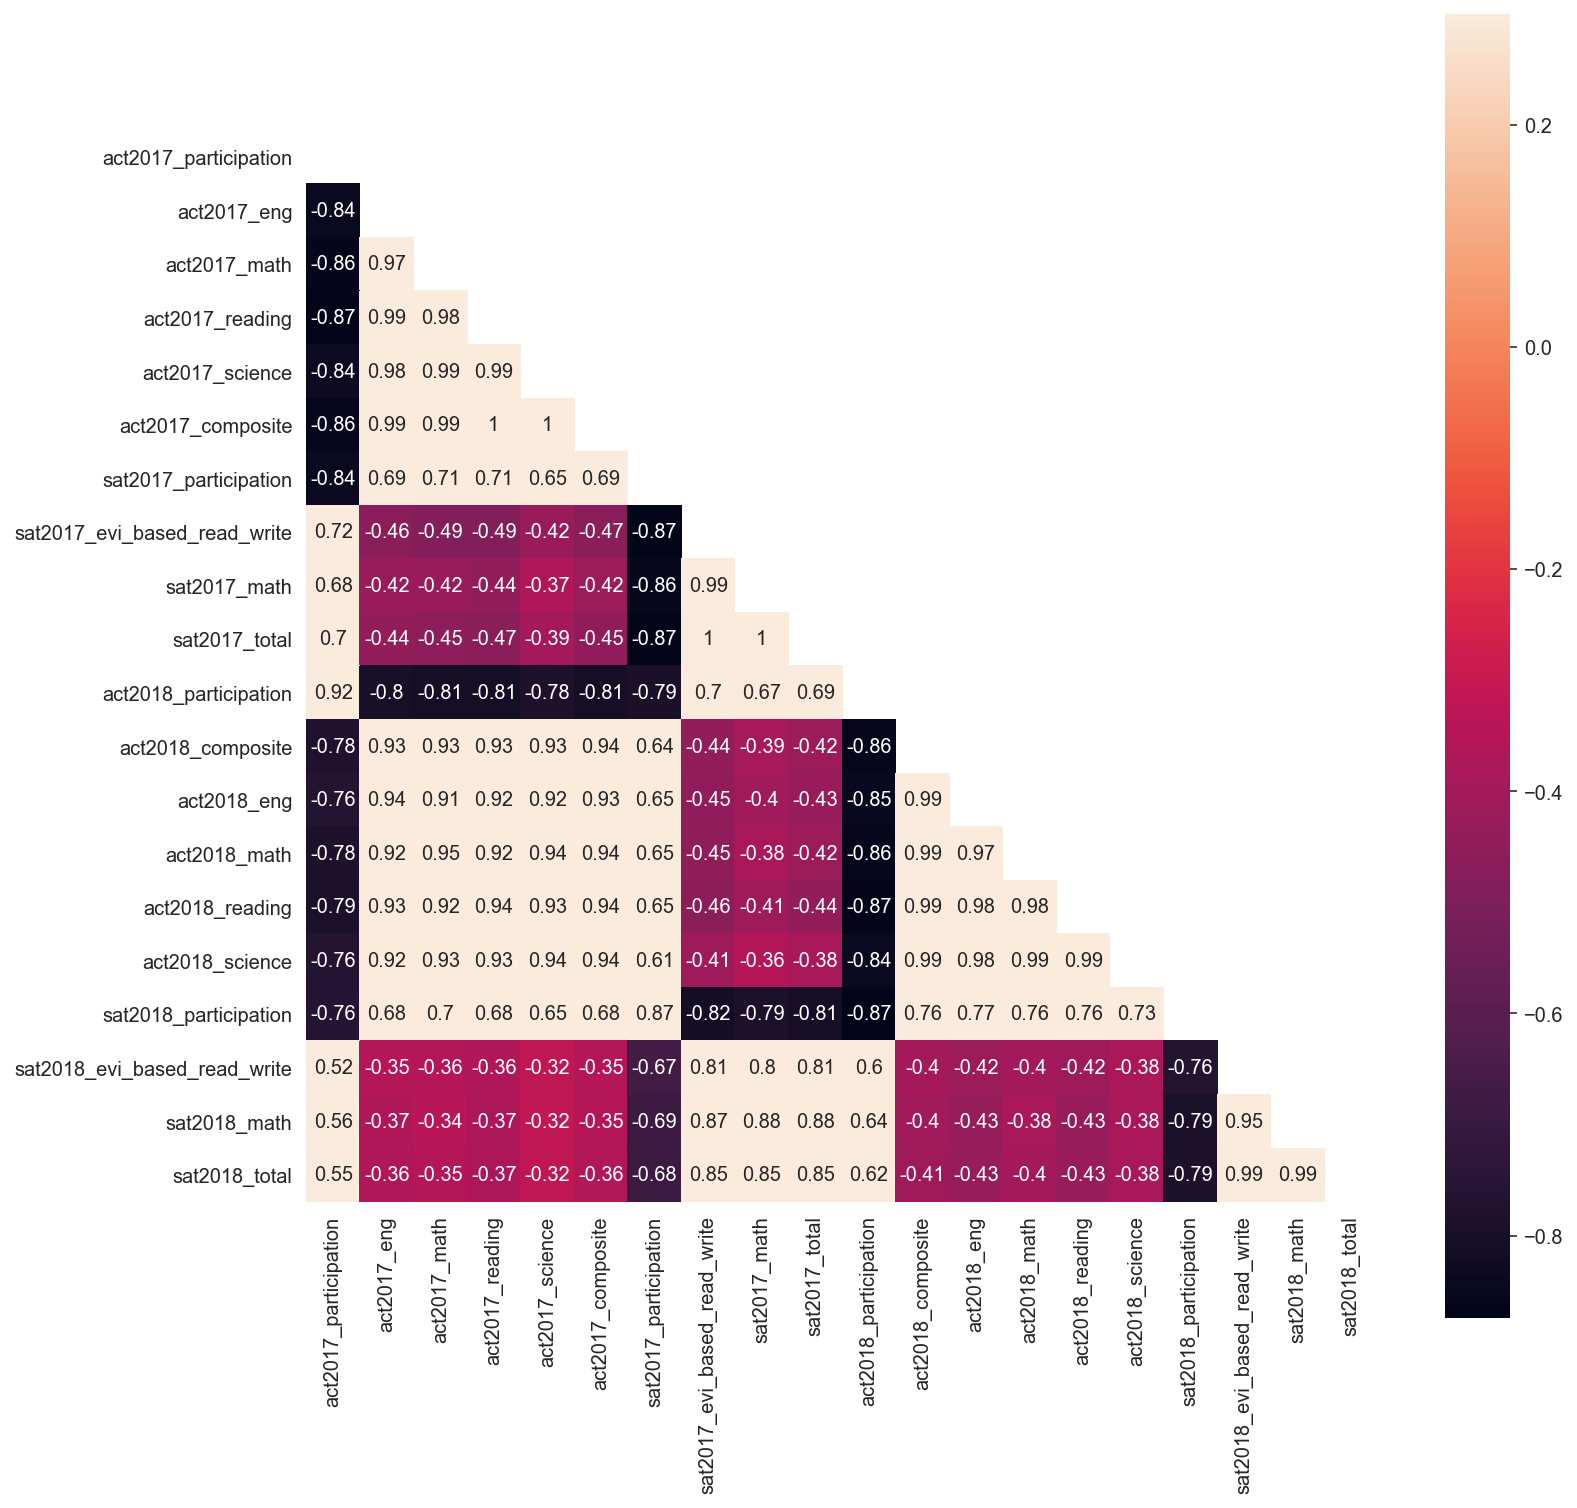

In [105]:
plt.figure(figsize=(12, 12))


mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(final.corr(), mask=mask, vmax=0.3, square=True, annot=True)

Answer: The heatmap gives a snapshot of the correlation of various averge scores. A high correlation between individual averages shows that likely they 

For example, the corellation between SAT Reading 2017 is very strong and SAT Math 2017 is 0.99. The positive value indicates that students who do well in one of them will also do well in the other.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
# sample code provided

#  def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
#     nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
#     fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
#     ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#     for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
#         ax[i].hist(dataframe[column]) # feel free to add more settings
#         # Set titles, labels, etc here for each subplot

In [106]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,12))
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns):  
        sns.distplot(dataframe[column], ax=ax[i], fit=norm, bins =10, kde=True)
        #ax[i].hist(dataframe[column]),
        ax[i].set_title(list_of_titles[i]),
        ax[i].set_xlabel(list_of_xlabels[i],
        ) 
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [107]:
# Participation rates for SAT & ACT

partpn_cols =['act2017_participation', 'act2018_participation', 
              'sat2017_participation', 'sat2018_participation' ]
partpn_titles = ['ACT 2017', 'ACT 2018', 'SAT 2017', 'SAT 2018']
partpn_xlabels = ['% participation', '% participation', '% participation', '% participation']

# y axis shows number of states with level of participation (in %) as given in x-axis


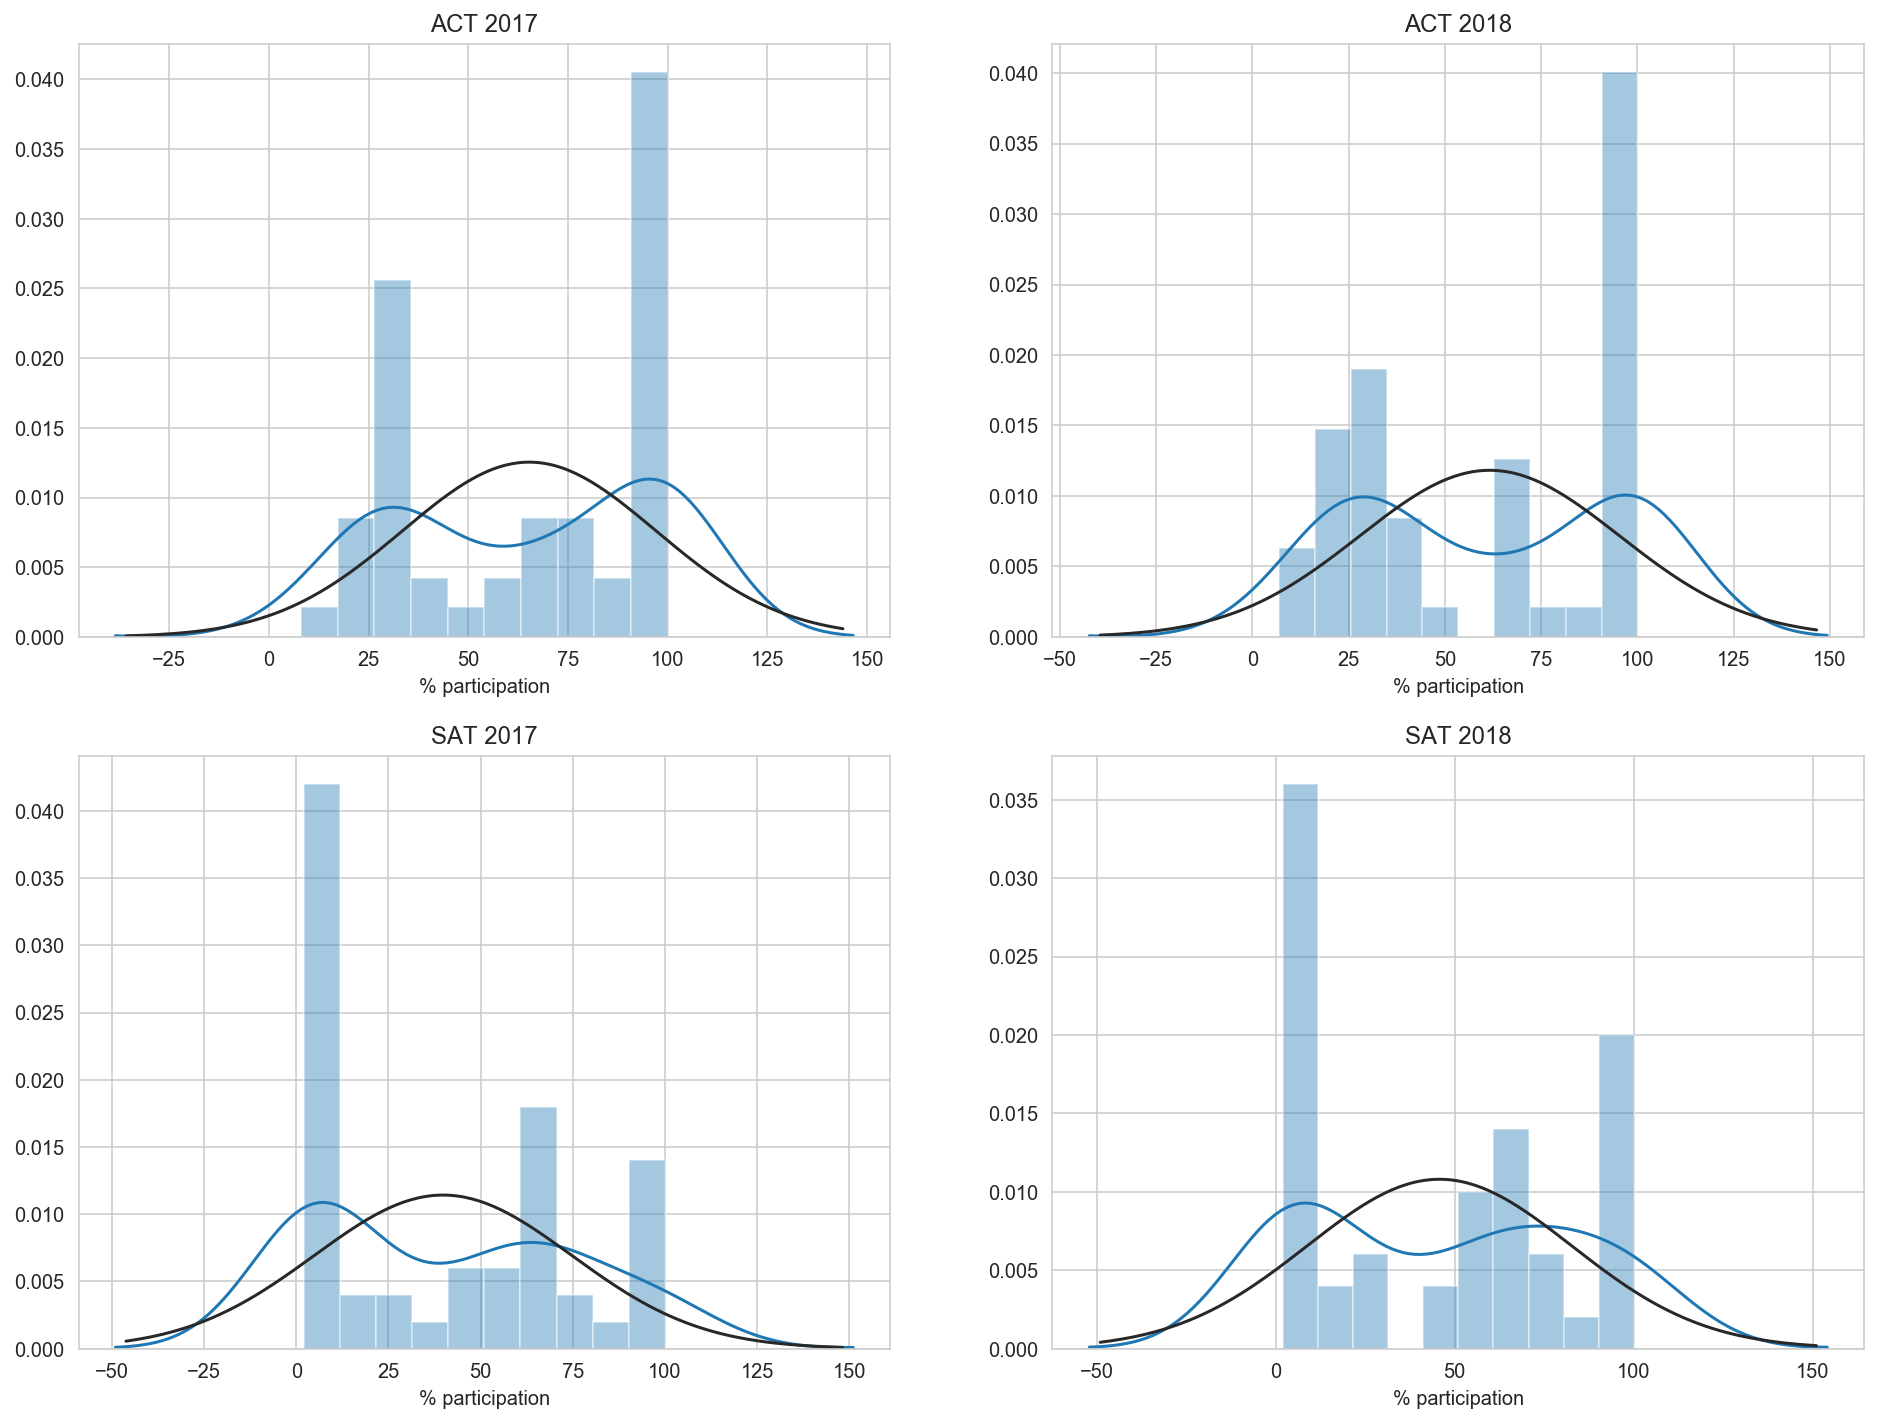

In [108]:
subplot_histograms(final, partpn_cols, partpn_titles, partpn_xlabels )

Answer: The participation rates are near normal in distribution. 
ACT is supported in many states with fee waivers and about 13 states have recorded 100% participation (11 of them consistent over the two years)

On the other hand, the higher levels of participation in SAT can be seen in the histogram plots above. This could be largely due to the pushing of SAT to be the preferred test for college admissions by the relevant Board.  

In [109]:
# Math scores for SAT & ACT
math_cols =['act2017_math', 'act2018_math', 
              'sat2017_math', 'sat2018_math' ]
math_titles = ['ACT 2017 MATH', 'ACT 2018 MATH', 'SAT 2017 MATH', 'SAT 2018 MATH']
math_xlabels = ['ave score range', 'ave score range', 'ave score range', 'ave score range']

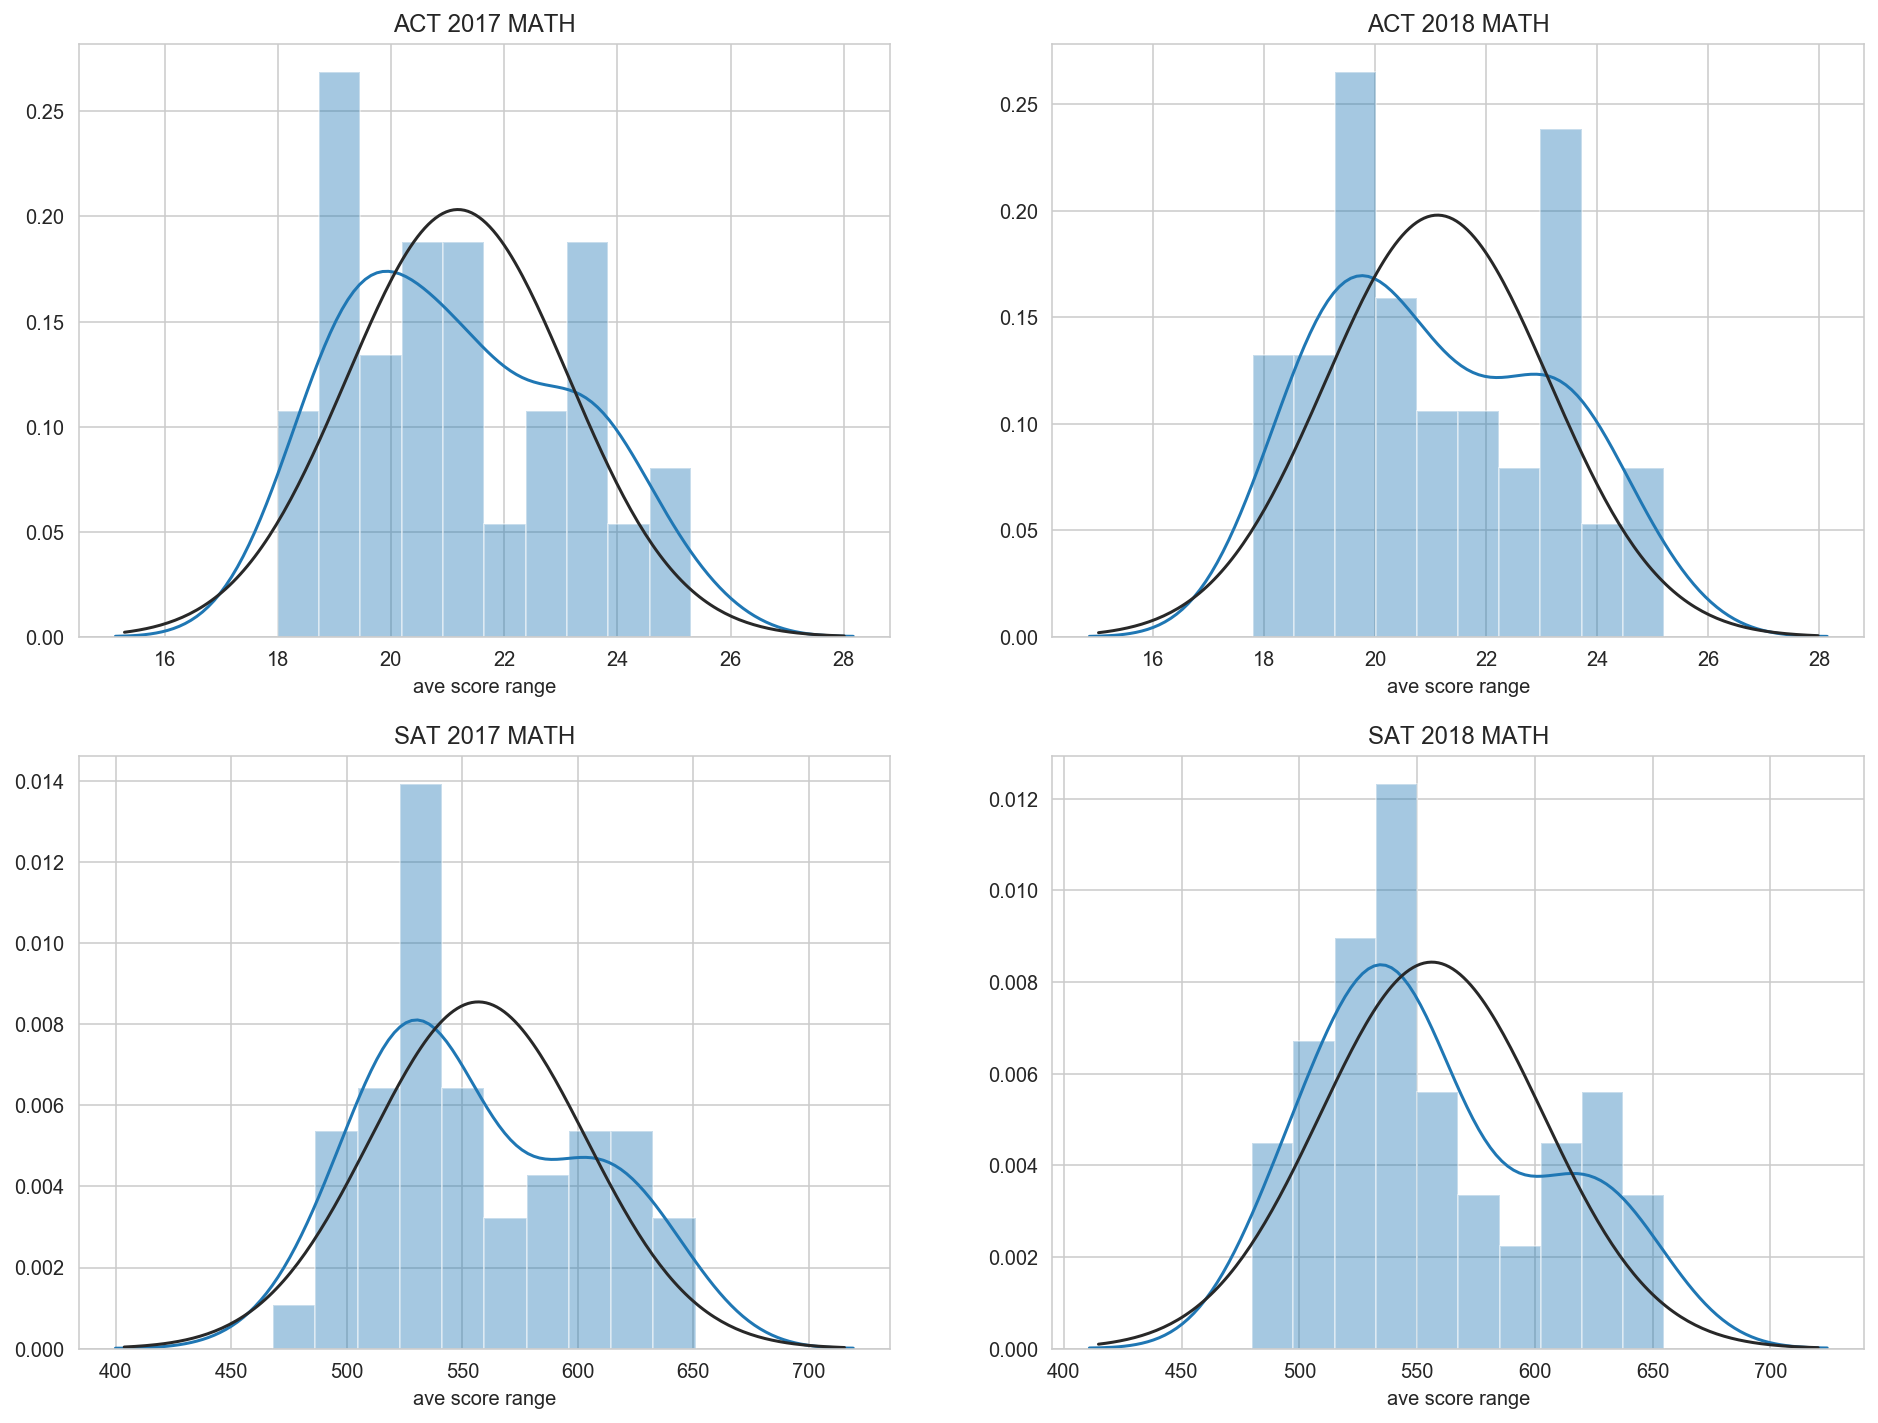

In [110]:
subplot_histograms(final, math_cols, math_titles, math_xlabels )

Answer: Math scores are generally found to be left skewed, although the year-on-year movement in SAT scores distribution towards normal distribution can be noted.

In [112]:
# Reading/verbal scores for SAT & ACT

reading_cols =['act2017_reading', 'act2018_reading', 
              'sat2017_evi_based_read_write', 'sat2018_evi_based_read_write' ]
reading_titles = ['ACT 2017 READING', 'ACT 2018 READING', 'SAT 2017 READING', 'SAT 2018 READING']
reading_xlabels = ['ave score range', 'ave score range', 'ave score range', 'ave score range']

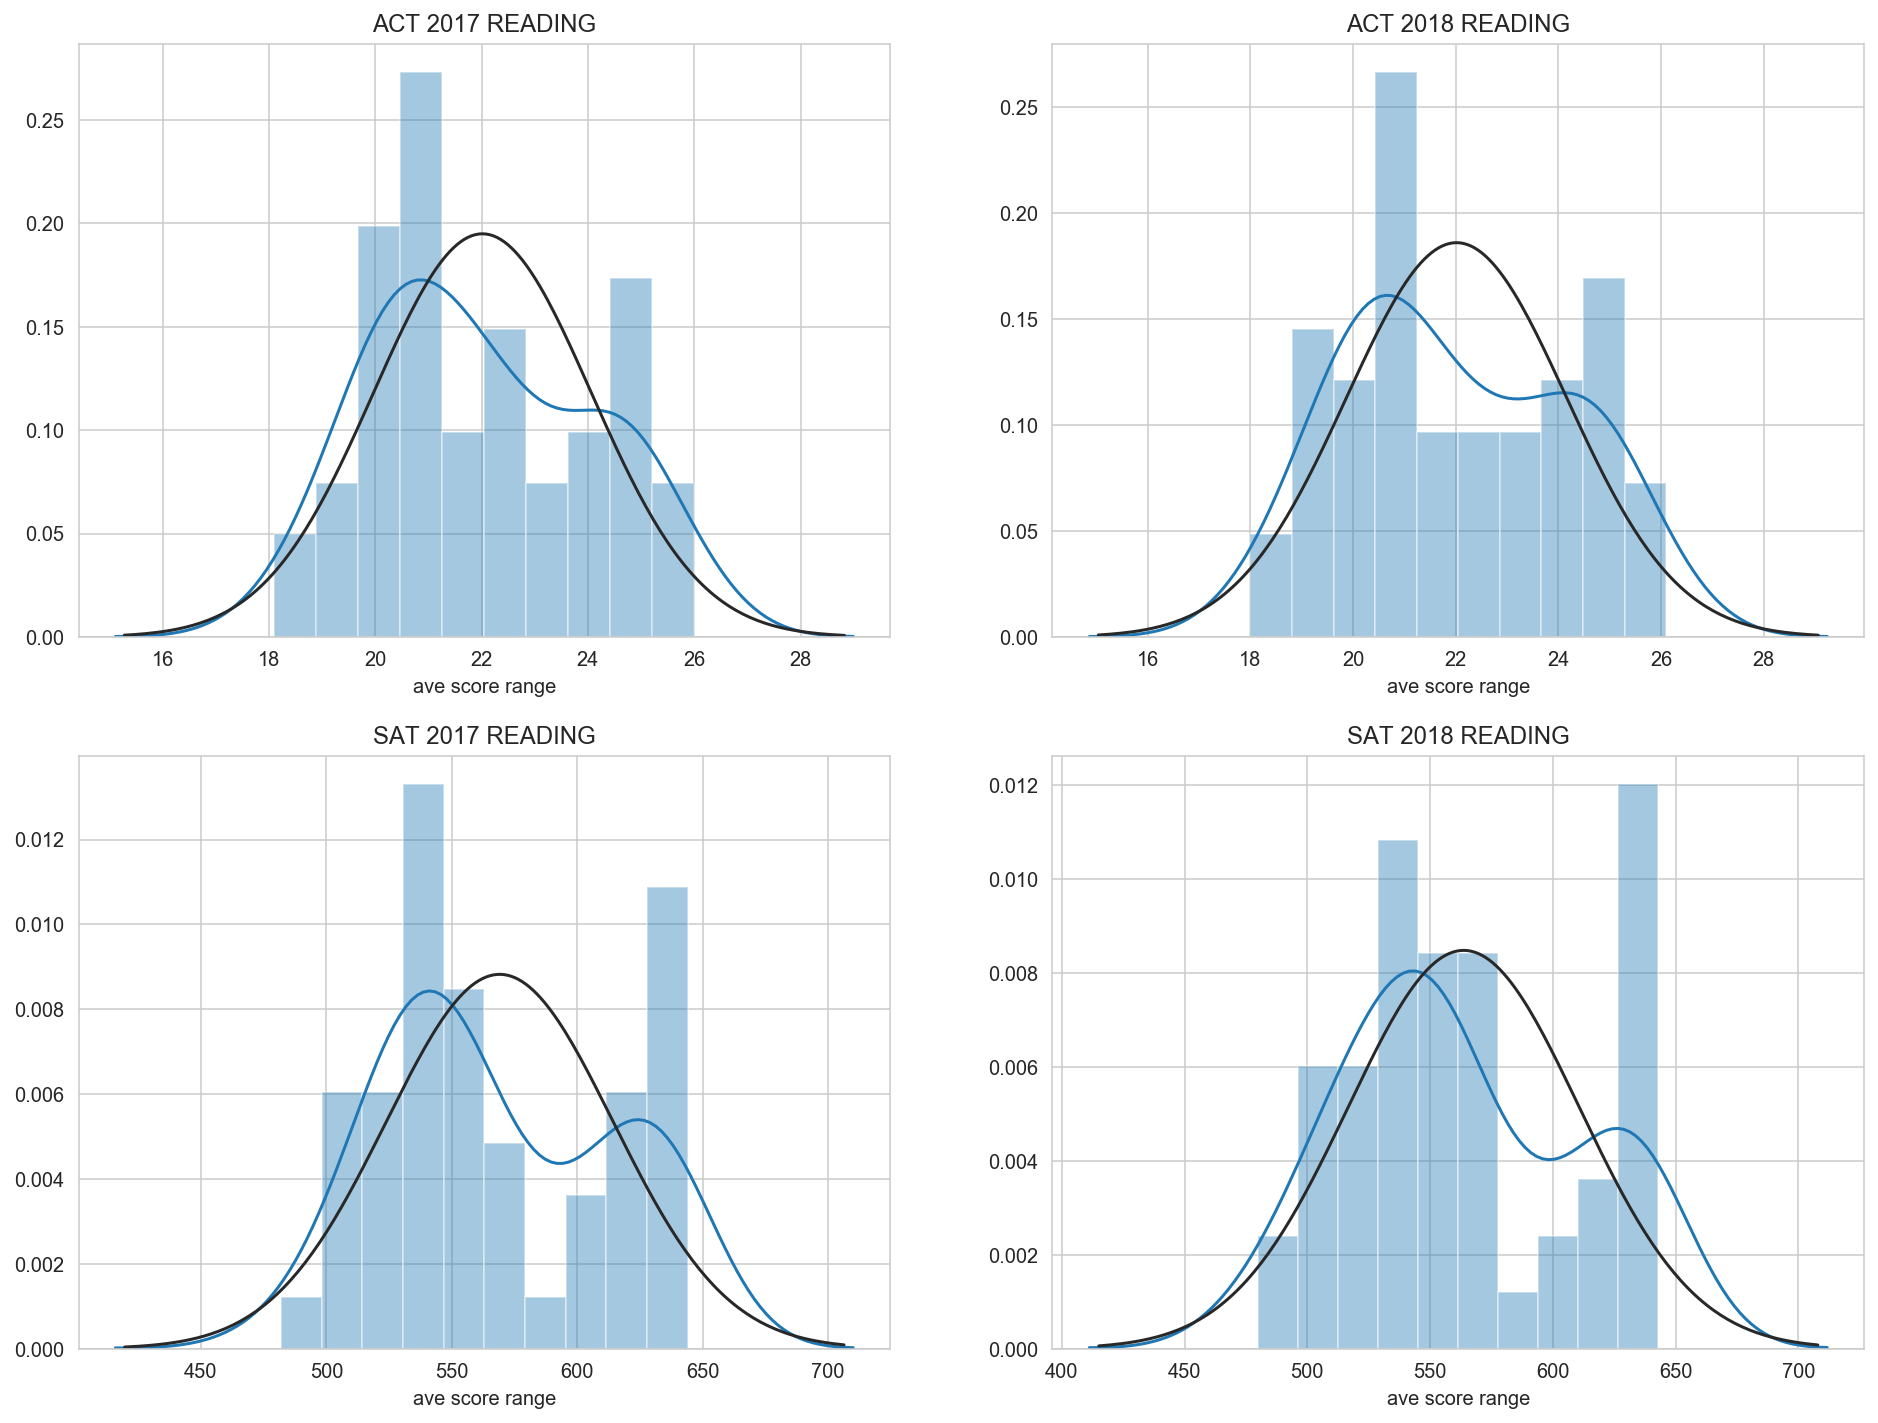

In [113]:
subplot_histograms(final, reading_cols, reading_titles, reading_xlabels )

Answer: Similarly, Reading scores are generally found to be left skewed, although the year-on-year movement in SAT scores distribution towards normal distribution can be noted.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


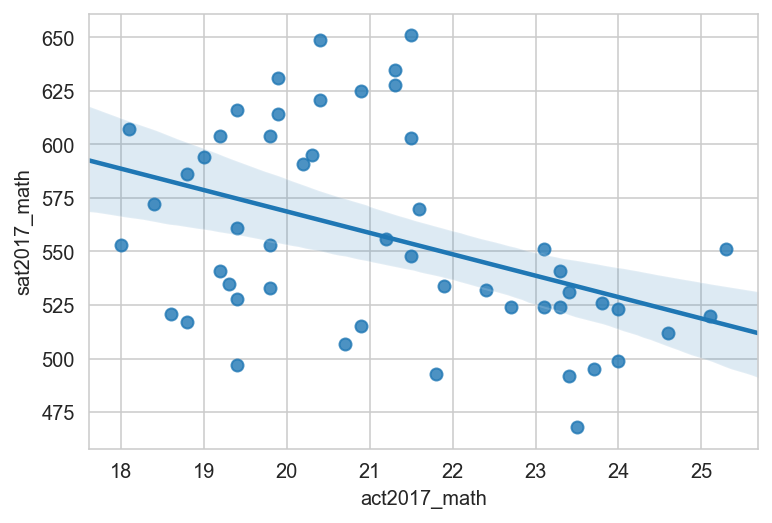

In [116]:
# SAT vs. ACT math scores for 2017

sns.regplot(x="act2017_math", y="sat2017_math", data=final);

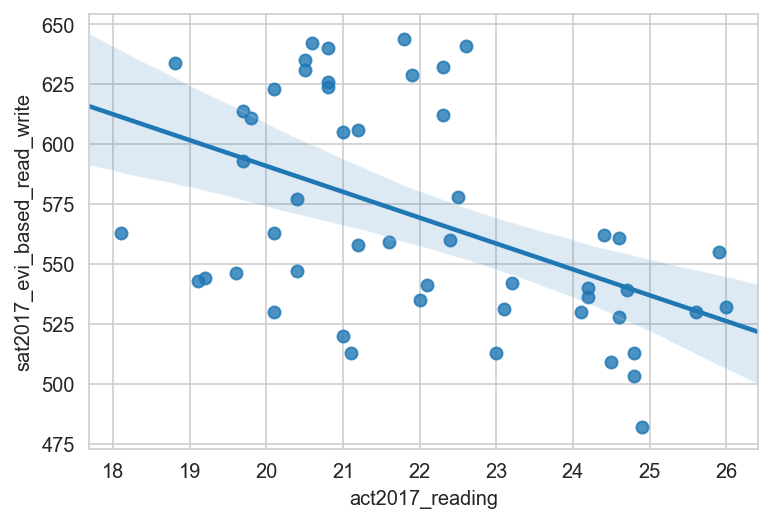

In [119]:
# SAT vs. ACT verbal/reading scores for 2017

sns.regplot(x="act2017_reading", y="sat2017_evi_based_read_write", data=final);

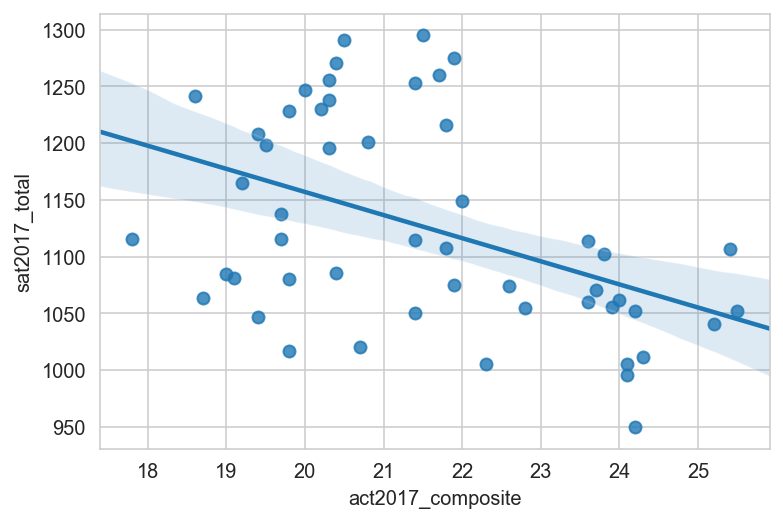

In [117]:
# SAT vs. ACT total/composite scores for 2017

sns.regplot(x="act2017_composite", y="sat2017_total", data=final);

Answer: A negative corellation between ACT and SAT topics was noted. This is probably due to participants selecting one test over another as has been observed earlier. Trend of moving from ACT to SAT as implemented  

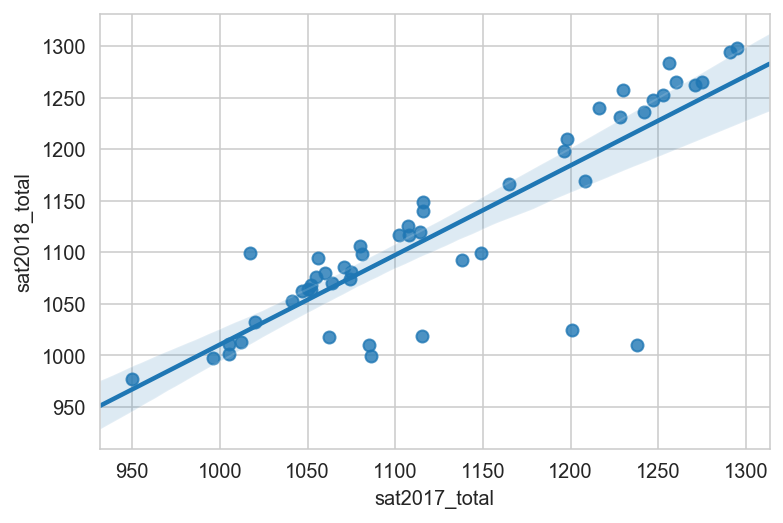

In [120]:
# Total scores for SAT 2017 vs. 2018

sns.regplot(x="sat2017_total", y="sat2018_total", data=final);

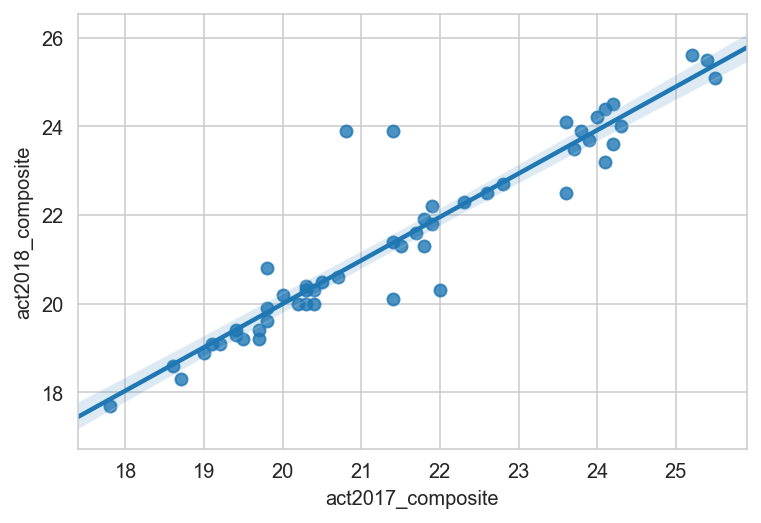

In [121]:
# Composite scores for ACT 2017 vs. 2018

sns.regplot(x="act2017_composite", y="act2018_composite", data=final);

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [122]:
# column list 

act2017.columns

Index(['state', 'act2017_participation', 'act2017_eng', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite'],
      dtype='object')

In [123]:
# preparing for plotting boxplot

a17_list = act2017.iloc[:,2:]
a17_list.head()

,act2017_eng,act2017_math,act2017_reading,act2017_science,act2017_composite
1,18.9,18.4,19.7,19.4,19.2
2,18.7,19.8,20.4,19.9,19.8
3,18.6,19.8,20.1,19.8,19.7
4,18.9,19.0,19.7,19.5,19.4
5,22.5,22.7,23.1,22.2,22.8


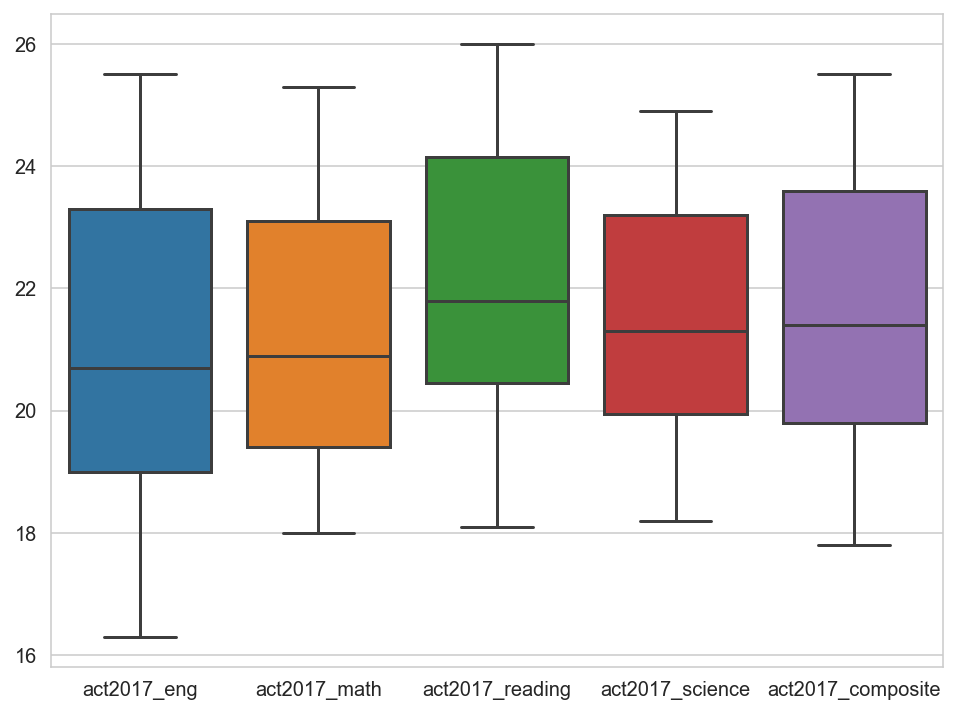

In [124]:
# boxplot using seaborn

plt.figure(figsize=(8,6))
sns.boxplot(data=act2017.iloc[:,2:]);

In [125]:
# preparing for plotting boxplot

act2018.columns

Index(['state', 'act2018_participation', 'act2018_composite', 'act2018_eng',
       'act2018_math', 'act2018_reading', 'act2018_science'],
      dtype='object')

In [126]:
# rearranging columns to get comparable images

act2018['comp'] = act2018['act2018_composite']
act2018.rename(columns = {'comp':'act2018_composite2'}, inplace=True)
act2018.head()


,state,act2018_participation,act2018_composite,act2018_eng,act2018_math,act2018_reading,act2018_science,act2018_composite2
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0,19.1
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7,20.8
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1,22.7


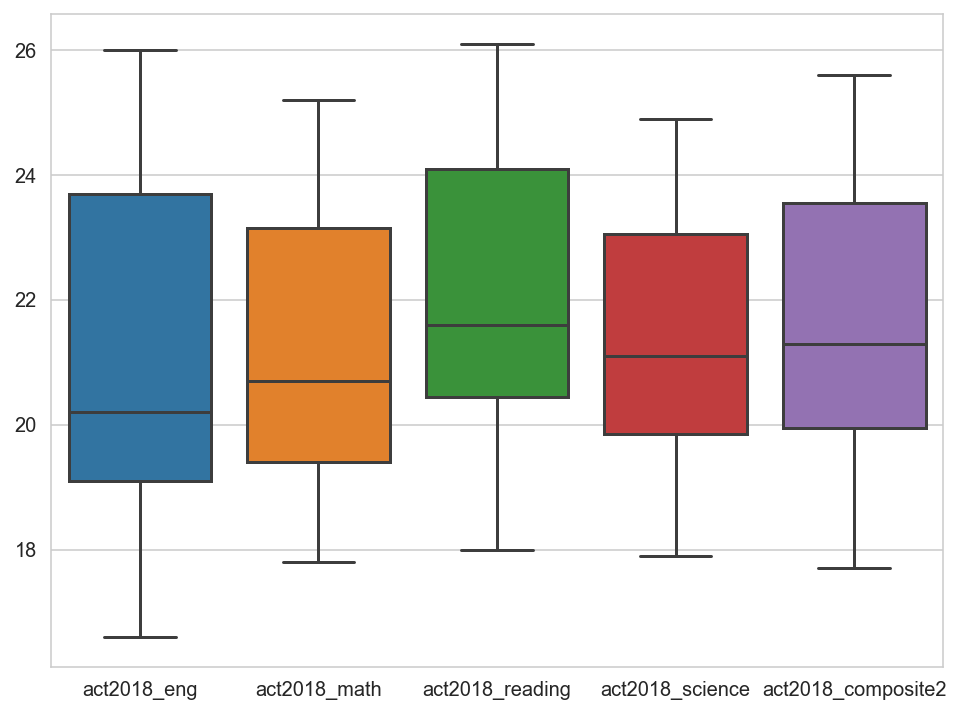

In [127]:
# boxplot using seaborn

plt.figure(figsize=(8,6))
sns.boxplot(data=act2018.iloc[:,3:8]);

Answer: Comparing the year-on-year boxplots for both ACT and SAT, following points are noted:

1. There are no outliers.
2. The lower median values seen reinforces the left skewed nature of the distribution

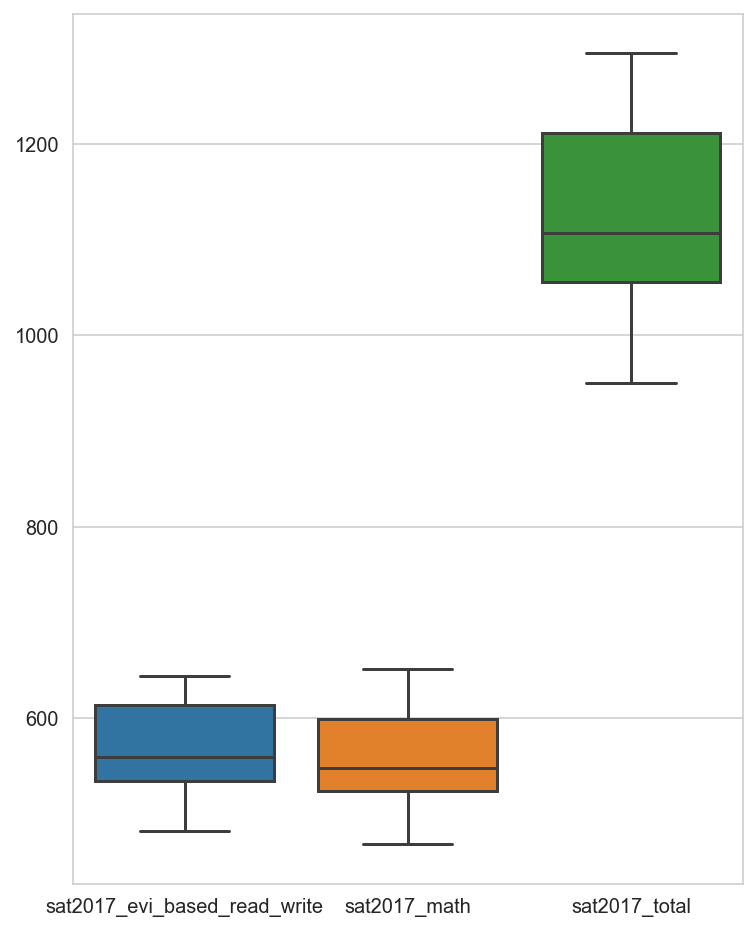

In [130]:
# boxplot using seaborn

plt.figure(figsize=(6,8))
sns.boxplot(data=sat2017.iloc[:,2:]);

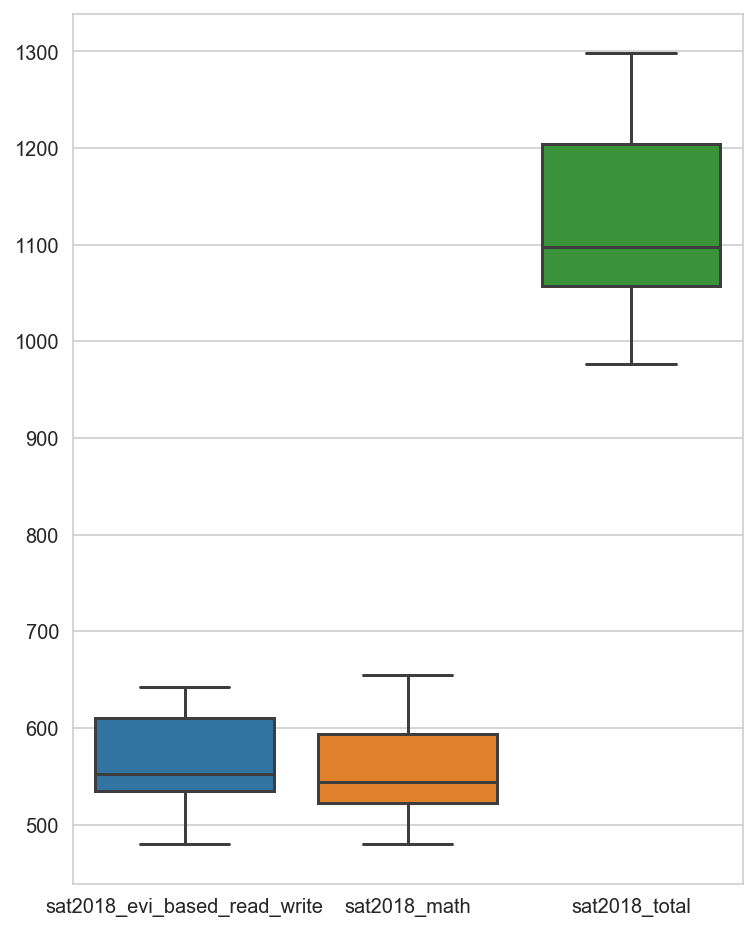

In [131]:
# boxplot using seaborn

plt.figure(figsize=(6,8))
sns.boxplot(data=sat2018.iloc[:,2:]);

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

'    '

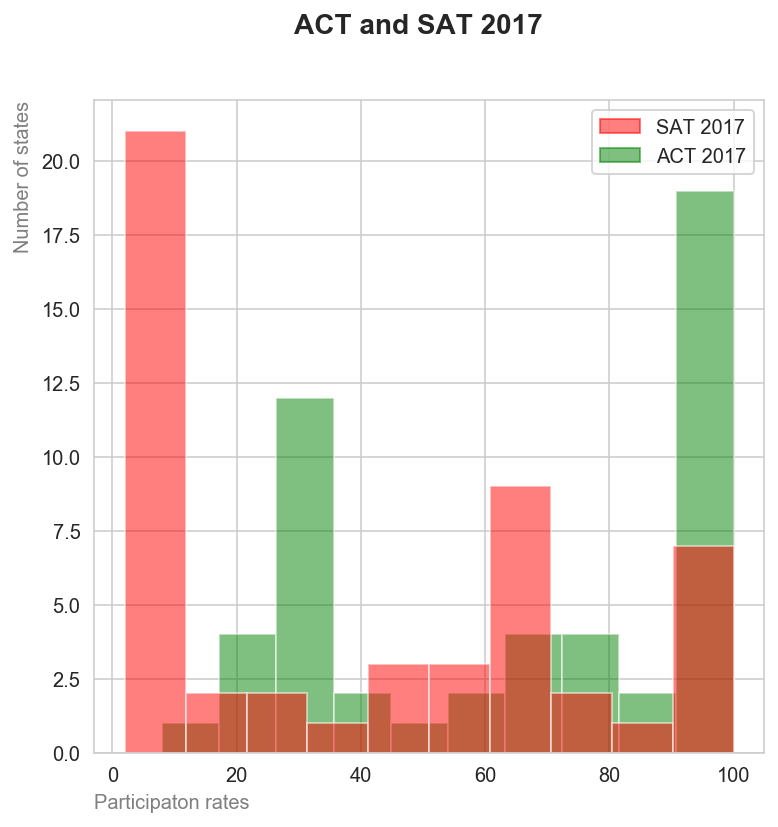

In [134]:
import matplotlib.patches as mpatches

plt.figure(figsize= (6,6))
plt.hist(final['act2017_participation'], bins = 10, color='g', alpha = 0.5)
plt.hist(final['sat2017_participation'], bins = 10, color='r', alpha = 0.5)
plt.xlabel('Participaton rates', position = (0,0), ha = 'left', color = 'grey') # (x,y)
plt.ylabel("Number of states", position = (0, 1), ha = 'right', color = 'grey')
plt.suptitle('ACT and SAT 2017', fontsize=14, fontweight='bold')
red_patch = mpatches.Patch(color='r', alpha = 0.5, label='SAT 2017')
green_patch = mpatches.Patch(color='g', alpha = 0.5, label='ACT 2017')
plt.legend(handles=[red_patch, green_patch])
;     

'    '

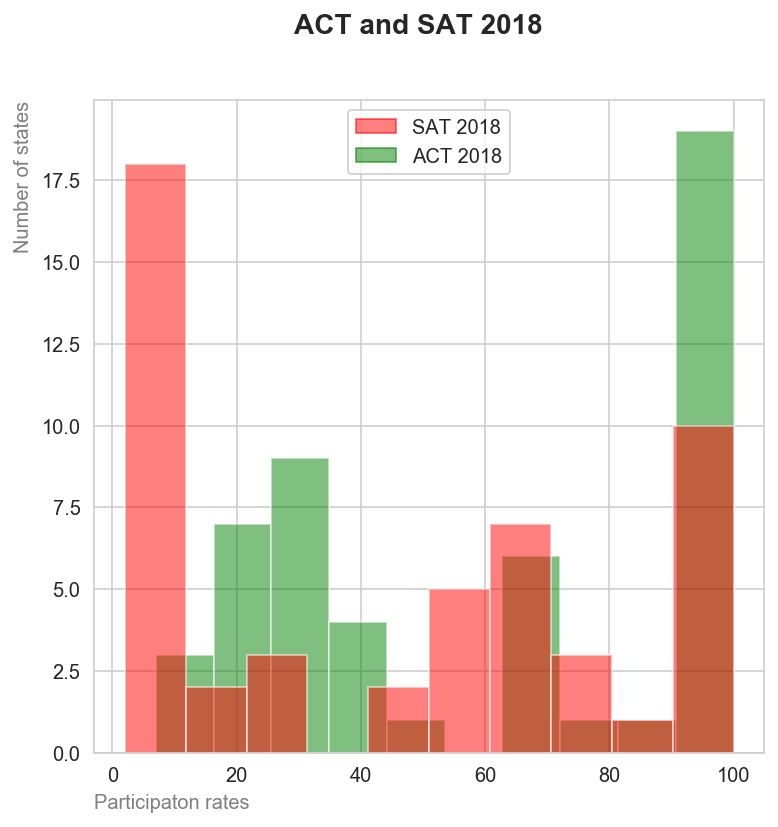

In [135]:
import matplotlib.patches as mpatches

plt.figure(figsize= (6,6))
plt.hist(final['act2018_participation'], bins = 10, color='g', alpha = 0.5)
plt.hist(final['sat2018_participation'], bins = 10, color='r', alpha = 0.5)
plt.xlabel('Participaton rates', position = (0,0), ha = 'left', color = 'grey') # (x,y)
plt.ylabel("Number of states", position = (0, 1), ha = 'right', color = 'grey')
plt.suptitle('ACT and SAT 2018', fontsize=14, fontweight='bold')
red_patch = mpatches.Patch(color='r', alpha = 0.5, label='SAT 2018')
green_patch = mpatches.Patch(color='g', alpha = 0.5, label='ACT 2018')
plt.legend(handles=[red_patch, green_patch])
;     

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers: Comments included earlier under respective plots with comments on normal and close to normal distributions

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Not all plots are Normal distribution.

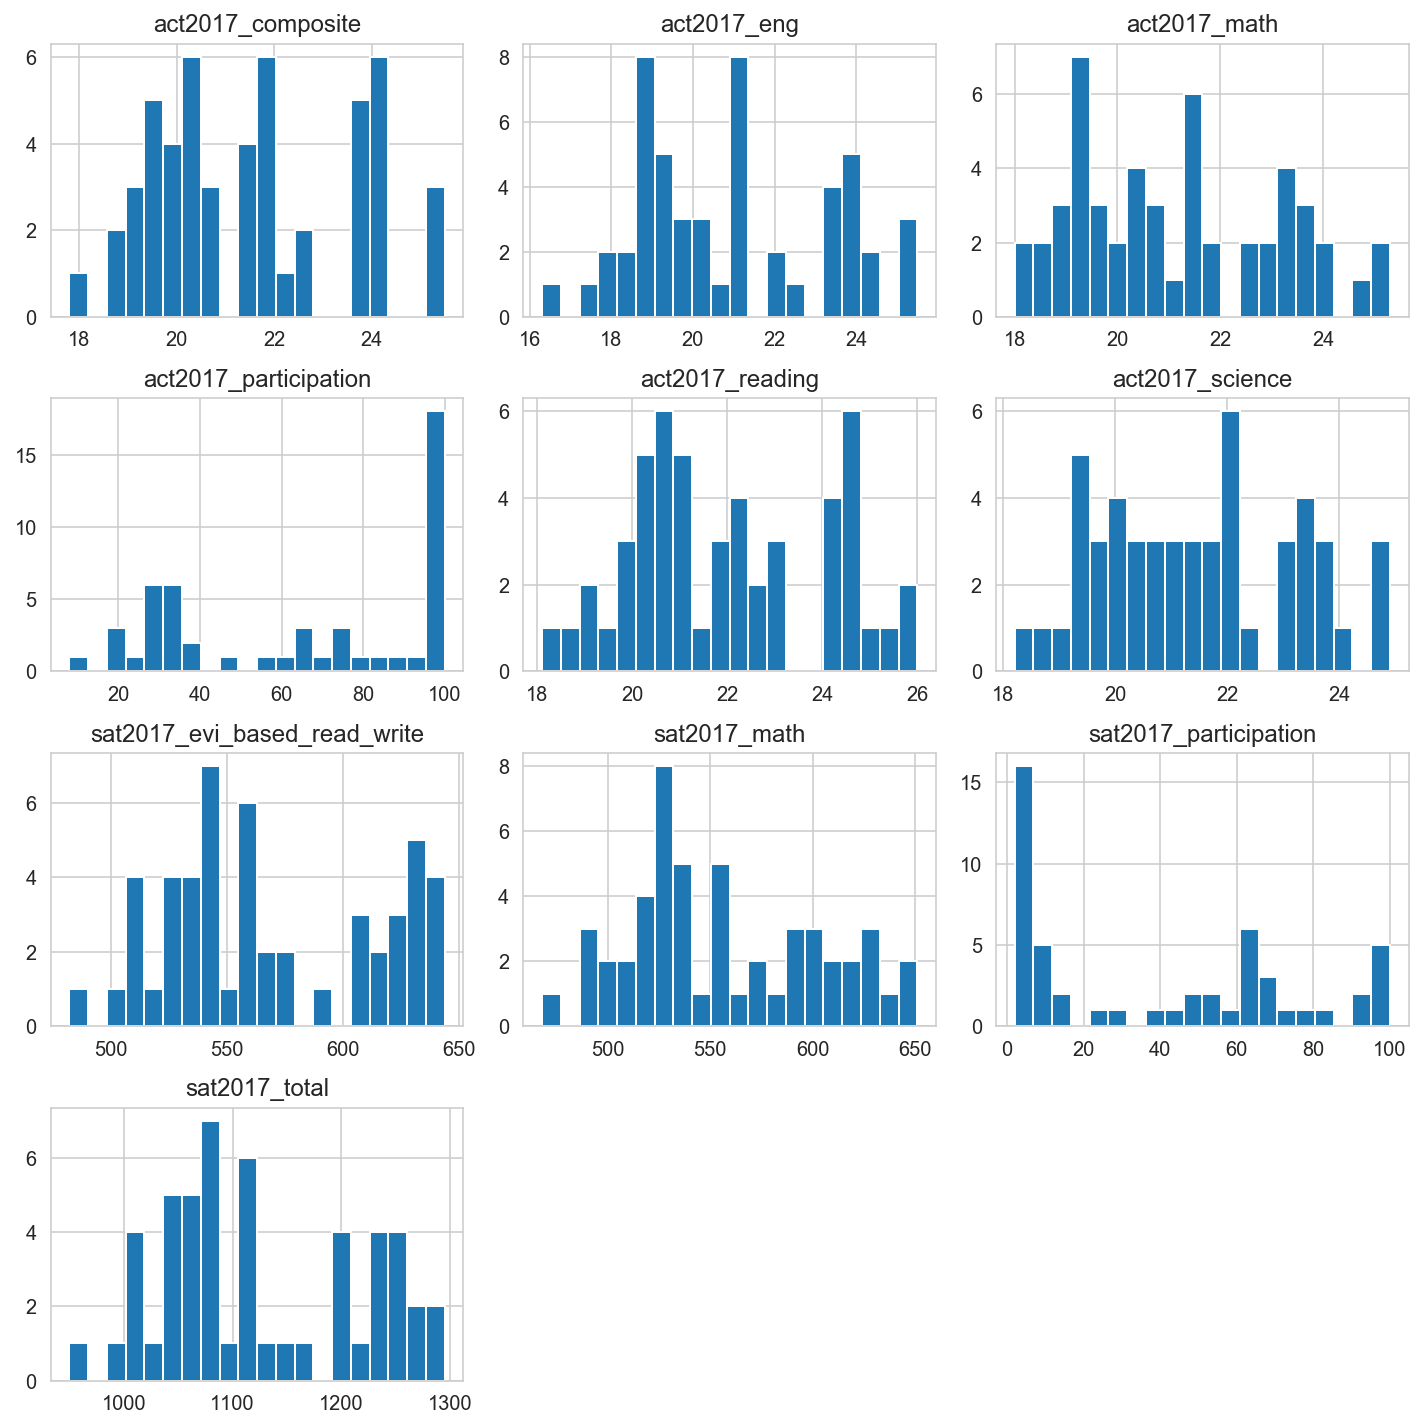

In [136]:
jt2017.hist(figsize=(10,10), bins=20)
plt.tight_layout()

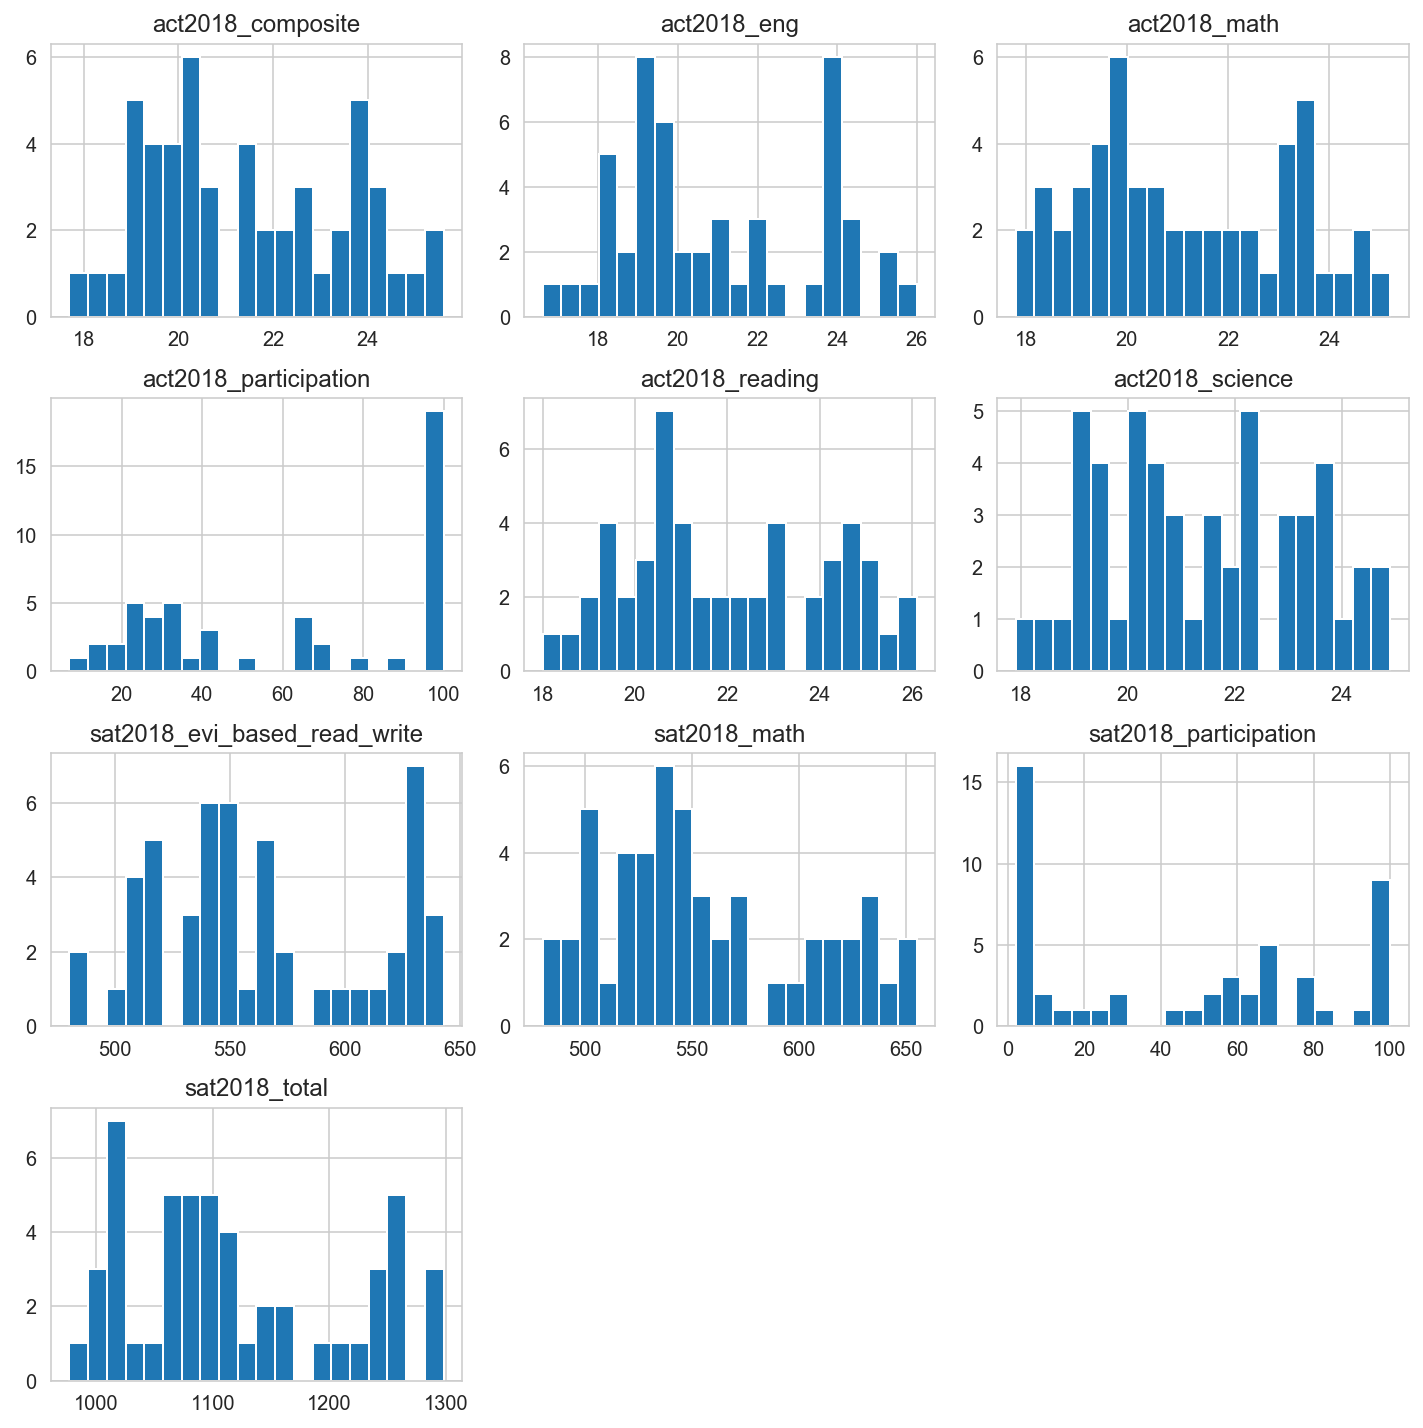

In [137]:
jt2018.hist(figsize=(10,10), bins=20)
plt.tight_layout()

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: Comments provided at the location of the plots earlier

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: The available data is for only 2 years, hence it is hard to predict trends. However, the timing is critical as many states are relooking at the ACT and SAt and policy decisions are being made on whether these should be mandatory or optional. Also, the cost of these decisions is an important factor for the administration. 

On the other hand, colleges themselves are questioning the holistic nature of tests and some are considering scrapping them totally. As of January 2018, over 1,000 colleges and universities have stopped requiring SAT or ACT scores for undergraduate applicants.

Reference:
http://bit.ly/2mUeuH0 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Unable to compare the math scores due to incompatability

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [138]:
# Null hypothesis: ACT and SAT average composite scores are similar for the years 2017 and 2018

final[['act2017_composite','act2018_composite']].describe()

,act2017_composite,act2018_composite
count,51.000000,51.000000
mean,21.519608,21.486275
std,2.020695,2.106278
min,17.800000,17.700000
25%,19.800000,19.950000
50%,21.400000,21.300000
75%,23.600000,23.550000
max,25.500000,25.600000


In [139]:
final[['sat2017_total','sat2018_total']].describe()

,sat2017_total,sat2018_total
count,51.000000,51.000000
mean,1126.098039,1120.019608
std,92.494812,94.155083
min,950.000000,977.000000
25%,1055.500000,1057.500000
50%,1107.000000,1098.000000
75%,1212.000000,1204.000000
max,1295.000000,1298.000000


In [140]:
stats.ttest_ind(final['act2017_composite'],final['act2018_composite'], equal_var=False)

Ttest_indResult(statistic=0.08155560824978776, pvalue=0.9351633936862667)

In [141]:
stats.ttest_ind(final['sat2017_total'],final['sat2018_total'], equal_var=False)

Ttest_indResult(statistic=0.32888697491988567, pvalue=0.7429291116643162)

Answer: Null hypothesis: ACT and SAT average composite scores are similar for the years 2017 and 2018

Since the pvalues are above alpha (0.05) there is insufficient data to accept or discard the Null Hyoothesis. This supports the earlier comment that additional info is needed to assess the Null hypothesis.


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer: Research done amd references provided earlier along with info accessed 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Answer: Pennsylvania


Strategies to convince state officials that SAT should be their choice
Share about past record of 2 years to show how the cohorts have done well in SAT
Ave SAT scores have grown along with SAT participation rates
Provide support to administrative faculty in organising for the test and students taking up the test
Conduct test on weekday to ensure high participation
Any other incentives for administrators (?)
Feedback from colleges / institutes of higher learning on how SAT can be made more holistic